### Python Lab: S. Gupta, L. Over, L. Sooter

In [1]:
import warnings;
warnings.filterwarnings('ignore');

In [2]:
# Import libraries
import csv
import pandas as pd

from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib

from numpy.random import seed
from numpy.random import randn
import numpy as np
from numpy import exp
from numpy import sqrt
from numpy import argmax
from numpy import arange
import os
import math
import seaborn as sns
from sklearn import metrics

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, f1_score
from sklearn.model_selection import cross_val_score

import imblearn as imb
from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoost, CatBoostClassifier, Pool, cv

import hyperopt
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import colorama
N_HYPEROPT_PROBES = 60
HYPEROPT_ALGO = tpe.suggest
colorama.init()

import hyperband
from hyperband import HyperbandSearchCV
import sklearn
sklearn.metrics.SCORERS.keys()

import csv
import shap

# Data Preprocessing

In [25]:
# Read in csv file for Python lab - train/validation set
pd.set_option('display.max_columns', None)
upmc_trn = pd.read_csv('PYTHON_LAB_TRAIN.csv')

# Display the head
upmc_trn.head()

,SCHED_SURG_AREA,RACE,ETHNIC_GROUP,PROC_DATE,SCHED_HOSPITAL,CREATE_DT_TM,SCHED_START_DT_TM,SCHED_SURG_PROC_CD,FEMALE,AGE_ON_CONTACT_DATE,BMI,WEIGHT,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,PCPVISIT,METFORMIN_FLAG,OPIOIDS_FLAG,ALPHA_BLOCKERS,CENTRAL_ANTAGONISTS,RENIN,BETA_BLOCKERS,ACE_INHIB,ARB,ALDOSTERONE_BLOCKERS,VASODIALATORS,DIURETICS,CALCIUM_BLOCKERS,STATINS,INSULIN_MEDS,ASPIRIN,WARFARIN,DOACS,PRETERM_17P,MEDROL,PREDNISONE,INHALED_STEROID_WITH_LABA,INHALED_STEROID_WITHOUT_LABA,INHALED_STEROIDS,ASTHMA_BIOLOGICS,SHORT_ACTING_BRONCHO_DIALATORS,TNF_INHIBITORS,IMMUNOMODULATORS,AMINOSALICYLATES,CORTICOSTEROIDS,ARNI,ALLOPURINOL,SEIZURE,MUSCLERELAXANT,DIGOXIN,INOTROPES,ANTI_ARRHYTHMIC,ANTIPLATELET,SULFONYLUREA,GLP_1_AGONIST,THIAZOLIDINEDIONE,SGLT2_INHIBITOR,DPP4_INHIBITOR,ALPHA_GLUCOSIDASE_INHIBITOR,AMYLINOMIMETIC,RAPID_ACTING_INSULIN,SHORT_ACTING_INSULIN,INTERMEDIATE_ACTING_INSULIN,LONG_ACTING_INSULIN,MINOCYCLINE,DOXYCYCLINE,MELATONIN,METHAZOLAMIDE,HYDROXYCHLOROQUINE,ITTC,DMARDS,OBESE_HST,MORBIDOBESE_HST,PH_HST,AFIB_HST,COPD_HST,CHF_HST,DIAB_HST,CAD_HST,OSTEO_HST,HTN_HST,CANCER_HST,LUNG_CANCER_HST,OVARIAN_CANCER_HST,HEAD_NECK_CANCER_HST,BREAST_CANCER_HST,ASTHMA_HST,GERD_HST,FIBROMYALGIA_HST,DEPRESSION_HST,PSORIATIC_ARTHRITIS_HST,RHEUM_ARTHRITIS_HST,LUPUS_HST,VTVF_HST,STROKE_HST,VASCULARDISEASE_HST,LOWBACKPAIN_HST,DVT_HST,PE_HST,HYPOTHYROIDISM_HST,ADRENAL_INSUFFICIENCY_HST,INFERTILITY_HST,CKD_HST,ESRD_HST,OBS_SLEEPAPNEA_HST,CARDIAC_ARREST_HST,HEMO_STROKE_HST,MAJOR_BLEED_HST,MACULAR_DEGEN_HST,ANXIETY_HST,HYPERLIPIDEMIA_HST,HIV_HST,ALZHEIMER_HST,COLORECTAL_CANCER_HST,ENDOMETRIAL_CANCER_HST,GLAUCOMA_HST,HIP_PELVIC_FRACTURE_HST,BENIGN_PROSTATIC_HYPERPLASIA_HST,CIRRHOSIS_HST,CIRRHOSIS_HST_1,CHOLESTEROL_CLOSEST,HDL_CLOSEST,LDL_CLOSEST,TRIG_CLOSEST,WBC_CLOSEST,HGB_CLOSEST,URIC_ACID_CLOSEST,HCO3_CLOSEST,SODIUM_CLOSEST,CREATININE_CLOSEST,EF_CLOSEST,FEV1_CLOSEST,EOS_CLOSEST,NEUTRO_CLOSEST,MONO_CLOSEST,BASOPHIL_CLOSEST,K_CLOSEST,EGFR_CLOSEST,TSH_CLOSEST,T4_CLOSEST,GLUCOSE_CLOSEST,HBA1C_CLOSEST,ESR_CLOSEST,VITAMIN_D_CLOSEST,MAGNESIUM_CLOSEST,FOLICAC_CLOSEST,VIT_B12_CLOSEST,BNP_CLOSEST,PLATELET_CLOSEST,PA_PRESSURE_CLOSEST,HEMATOCRIT_CLOSEST,ALBUMIN_CLOSEST,PREALBUMIN_CLOSEST,MR_CLOSEST,TR_CLOSEST,MEANPLATELETVOL_CLOSEST,MCH_CLOSEST,RDW_CLOSEST,MCV_CLOSEST,MCHC_CLOSEST,RBC_CLOSEST,LYMPHOCYTE_CLOSEST,CA125_CLOSEST,BILIRUBIN_CLOSEST,ALT_CLOSEST,AST_CLOSEST,CA_CLOSEST,PHOSPHORUS_CLOSEST,URINEPROTEIN_CLOSEST,TOTALPREVIOUSHOSPVISITS,TOTALPREVIOUSEDVISITS,TOTALPREVIOUSPCPVISITS,PREVIOUSSPECIALTYVISIT,PREVIOUSURGENTCAREVISIT,CAV_REC_SEX,CAV_REC_LANG,CAV_REC_AGE,CAV_REC_IPOP,CAV_REC_PRIORITY_CODE,CAV_REC_DISP_CODE,UREA_NITROGEN_MAX_1,UREA_NITROGEN_MIN_1,CALCIUM_MAX_1,CALCIUM_MIN_1,IRON_MAX_1,IRON_MIN_1,GLUCOSE_MAX_1,GLUCOSE_MIN_1,HGB_MAX_1,HGB_MIN_1,HEMATOCRIT_MAX_1,HEMATOCRIT_MIN_1,CHLORIDE_MAX_1,CHLORIDE_MIN_1,SODIUM_MAX_1,SODIUM_MIN_1,CREATININE_MAX_1,CREATININE_MIN_1,CARBON_DIOXIDE_MAX_1,CARBON_DIOXIDE_MIN_1,RBC_MAX_1,RBC_MIN_1,MCV_MAX_1,MCV_MIN_1,MCH_MAX_1,MCH_MIN_1,MCHC_MAX_1,MCHC_MIN_1,ANION_GAP_MAX_1,ANION_GAP_MIN_1,PLATELETS_MAX_1,PLATELETS_MIN_1,WBC_MAX_1,WBC_MIN_1,MEAN_PLATELET_VOLUME_MAX_1,MEAN_PLATELET_VOLUME_MIN_1,EGFR_MAX_1,EGFR_MIN_1,RDW_MAX_1,RDW_MIN_1,BASOPHILS_MAX_1,BASOPHILS_MIN_1,NEUTROPHILS_MAX_1,NEUTROPHILS_MIN_1,LYMPHOCYTES_MAX_1,LYMPHOCYTES_MIN_1,MONOCYTES_MAX_1,MONOCYTES_MIN_1,EOSINOPHILS_MAX_1,EOSINOPHILS_MIN_1,MAGNESIUM_MAX_1,MAGNESIUM_MIN_1,PHOSPHORUS_MAX_1,PHOSPHORUS_MIN_1,INR_MAX_1,INR_MIN_1,ALBUMIN_MAX_1,ALBUMIN_MIN_1,TOTAL_BILIRUBIN_MAX_1,TOTAL_BILIRUBIN_MIN_1,AST_MAX_1,AST_MIN_1,ALT_MAX_1,ALT_MIN_1,ALKALINE_PHOSPHATASE_MAX_1,ALKALINE_PHOSPHATASE_MIN_1,TOTAL_PROTEIN_MAX_1,TOTAL_PROTEIN_MIN_1,BUN_CREATININE_RATIO_MAX_1,ACTIVATED_PTT_MAX_1,BUN_CREATININE_RATIO_MIN_1,ACTIVATED_PTT_MIN_1,TROPONIN_I_MAX_1,TROPONIN_I_MIN_1,SPECIFIC_GRAVITY_URINE_MAX_1,SPECIFIC_GRAVITY_URINE_MIN_1,PROTEIN_URINE_MAX_1,PROTEIN_URINE_MIN_1,PH_URINE_MAX_1,PH_URINE_MIN_1,KETONES_URINE_MAX_1,KETONES_URINE_MIN_1,URINE_NITRITE_MAX_1,URINE_NITRITE_MIN_1,LEUKOCYT

In [26]:
# Read in csv file for Python lab - test set
upmc_tst = pd.read_csv('PYTHON_LAB_DF_TEST_2.csv')

# Display the head
upmc_tst.head()

,ID1,SCHED_SURG_AREA,RACE,ETHNIC_GROUP,PROC_DATE,SCHED_HOSPITAL,CREATE_DT_TM,SCHED_START_DT_TM,SCHED_SURG_PROC_CD,FEMALE,AGE_ON_CONTACT_DATE,BMI,WEIGHT,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,PCPVISIT,METFORMIN_FLAG,OPIOIDS_FLAG,ALPHA_BLOCKERS,CENTRAL_ANTAGONISTS,RENIN,BETA_BLOCKERS,ACE_INHIB,ARB,ALDOSTERONE_BLOCKERS,VASODIALATORS,DIURETICS,CALCIUM_BLOCKERS,STATINS,INSULIN_MEDS,ASPIRIN,WARFARIN,DOACS,PRETERM_17P,MEDROL,PREDNISONE,INHALED_STEROID_WITH_LABA,INHALED_STEROID_WITHOUT_LABA,INHALED_STEROIDS,ASTHMA_BIOLOGICS,SHORT_ACTING_BRONCHO_DIALATORS,TNF_INHIBITORS,IMMUNOMODULATORS,AMINOSALICYLATES,CORTICOSTEROIDS,ARNI,ALLOPURINOL,SEIZURE,MUSCLERELAXANT,DIGOXIN,INOTROPES,ANTI_ARRHYTHMIC,ANTIPLATELET,SULFONYLUREA,GLP_1_AGONIST,THIAZOLIDINEDIONE,SGLT2_INHIBITOR,DPP4_INHIBITOR,ALPHA_GLUCOSIDASE_INHIBITOR,AMYLINOMIMETIC,RAPID_ACTING_INSULIN,SHORT_ACTING_INSULIN,INTERMEDIATE_ACTING_INSULIN,LONG_ACTING_INSULIN,MINOCYCLINE,DOXYCYCLINE,MELATONIN,METHAZOLAMIDE,HYDROXYCHLOROQUINE,ITTC,DMARDS,OBESE_HST,MORBIDOBESE_HST,PH_HST,AFIB_HST,COPD_HST,CHF_HST,DIAB_HST,CAD_HST,OSTEO_HST,HTN_HST,CANCER_HST,LUNG_CANCER_HST,OVARIAN_CANCER_HST,HEAD_NECK_CANCER_HST,BREAST_CANCER_HST,ASTHMA_HST,GERD_HST,FIBROMYALGIA_HST,DEPRESSION_HST,PSORIATIC_ARTHRITIS_HST,RHEUM_ARTHRITIS_HST,LUPUS_HST,VTVF_HST,STROKE_HST,VASCULARDISEASE_HST,LOWBACKPAIN_HST,DVT_HST,PE_HST,HYPOTHYROIDISM_HST,ADRENAL_INSUFFICIENCY_HST,INFERTILITY_HST,CKD_HST,ESRD_HST,OBS_SLEEPAPNEA_HST,CARDIAC_ARREST_HST,HEMO_STROKE_HST,MAJOR_BLEED_HST,MACULAR_DEGEN_HST,ANXIETY_HST,HYPERLIPIDEMIA_HST,HIV_HST,ALZHEIMER_HST,COLORECTAL_CANCER_HST,ENDOMETRIAL_CANCER_HST,GLAUCOMA_HST,HIP_PELVIC_FRACTURE_HST,BENIGN_PROSTATIC_HYPERPLASIA_HST,CIRRHOSIS_HST,CIRRHOSIS_HST_1,CHOLESTEROL_CLOSEST,HDL_CLOSEST,LDL_CLOSEST,TRIG_CLOSEST,WBC_CLOSEST,HGB_CLOSEST,URIC_ACID_CLOSEST,HCO3_CLOSEST,SODIUM_CLOSEST,CREATININE_CLOSEST,EF_CLOSEST,FEV1_CLOSEST,EOS_CLOSEST,NEUTRO_CLOSEST,MONO_CLOSEST,BASOPHIL_CLOSEST,K_CLOSEST,EGFR_CLOSEST,TSH_CLOSEST,T4_CLOSEST,GLUCOSE_CLOSEST,HBA1C_CLOSEST,ESR_CLOSEST,VITAMIN_D_CLOSEST,MAGNESIUM_CLOSEST,FOLICAC_CLOSEST,VIT_B12_CLOSEST,BNP_CLOSEST,PLATELET_CLOSEST,PA_PRESSURE_CLOSEST,HEMATOCRIT_CLOSEST,ALBUMIN_CLOSEST,PREALBUMIN_CLOSEST,MR_CLOSEST,TR_CLOSEST,MEANPLATELETVOL_CLOSEST,MCH_CLOSEST,RDW_CLOSEST,MCV_CLOSEST,MCHC_CLOSEST,RBC_CLOSEST,LYMPHOCYTE_CLOSEST,CA125_CLOSEST,BILIRUBIN_CLOSEST,ALT_CLOSEST,AST_CLOSEST,CA_CLOSEST,PHOSPHORUS_CLOSEST,URINEPROTEIN_CLOSEST,TOTALPREVIOUSHOSPVISITS,TOTALPREVIOUSEDVISITS,TOTALPREVIOUSPCPVISITS,PREVIOUSSPECIALTYVISIT,PREVIOUSURGENTCAREVISIT,CAV_REC_SEX,CAV_REC_LANG,CAV_REC_AGE,CAV_REC_IPOP,CAV_REC_PRIORITY_CODE,CAV_REC_DISP_CODE,UREA_NITROGEN_MAX_1,UREA_NITROGEN_MIN_1,CALCIUM_MAX_1,CALCIUM_MIN_1,IRON_MAX_1,IRON_MIN_1,GLUCOSE_MAX_1,GLUCOSE_MIN_1,HGB_MAX_1,HGB_MIN_1,HEMATOCRIT_MAX_1,HEMATOCRIT_MIN_1,CHLORIDE_MAX_1,CHLORIDE_MIN_1,SODIUM_MAX_1,SODIUM_MIN_1,CREATININE_MAX_1,CREATININE_MIN_1,CARBON_DIOXIDE_MAX_1,CARBON_DIOXIDE_MIN_1,RBC_MAX_1,RBC_MIN_1,MCV_MAX_1,MCV_MIN_1,MCH_MAX_1,MCH_MIN_1,MCHC_MAX_1,MCHC_MIN_1,ANION_GAP_MAX_1,ANION_GAP_MIN_1,PLATELETS_MAX_1,PLATELETS_MIN_1,WBC_MAX_1,WBC_MIN_1,MEAN_PLATELET_VOLUME_MAX_1,MEAN_PLATELET_VOLUME_MIN_1,EGFR_MAX_1,EGFR_MIN_1,RDW_MAX_1,RDW_MIN_1,BASOPHILS_MAX_1,BASOPHILS_MIN_1,NEUTROPHILS_MAX_1,NEUTROPHILS_MIN_1,LYMPHOCYTES_MAX_1,LYMPHOCYTES_MIN_1,MONOCYTES_MAX_1,MONOCYTES_MIN_1,EOSINOPHILS_MAX_1,EOSINOPHILS_MIN_1,MAGNESIUM_MAX_1,MAGNESIUM_MIN_1,PHOSPHORUS_MAX_1,PHOSPHORUS_MIN_1,INR_MAX_1,INR_MIN_1,ALBUMIN_MAX_1,ALBUMIN_MIN_1,TOTAL_BILIRUBIN_MAX_1,TOTAL_BILIRUBIN_MIN_1,AST_MAX_1,AST_MIN_1,ALT_MAX_1,ALT_MIN_1,ALKALINE_PHOSPHATASE_MAX_1,ALKALINE_PHOSPHATASE_MIN_1,TOTAL_PROTEIN_MAX_1,TOTAL_PROTEIN_MIN_1,BUN_CREATININE_RATIO_MAX_1,ACTIVATED_PTT_MAX_1,BUN_CREATININE_RATIO_MIN_1,ACTIVATED_PTT_MIN_1,TROPONIN_I_MAX_1,TROPONIN_I_MIN_1,SPECIFIC_GRAVITY_URINE_MAX_1,SPECIFIC_GRAVITY_URINE_MIN_1,PROTEIN_URINE_MAX_1,PROTEIN_URINE_MIN_1,PH_URINE_MAX_1,PH_URINE_MIN_1,KETONES_URINE_MAX_1,KETONES_URINE_MIN_1,URINE_NITRITE_MAX_1,URINE_NITRITE_MIN_1,LEUK

In [27]:
trn = upmc_trn.copy()
tst = upmc_tst.copy()

In [28]:
trn['LOS'].isnull().sum()

0

### Combine train/validate and test sets for processing

In [29]:
# Datasets must have the same columns in the same order 
# Columns that are not in both sets or that are in a different order
# will not persist when the two are combined
# Add LOS column with -999 values in the test set, add ID_tmp with -999 values to the train set
# Add ID_tmp with ID1 values in the test set so it has the IDs at the end like train does
# Drop ID1 from test
tst['LOS'] = -999
trn['ID_tmp'] = -999
tst['ID_tmp'] = tst['ID1']
tst.drop(['ID1'], inplace=True, axis=1)

In [30]:
tst.head()

,SCHED_SURG_AREA,RACE,ETHNIC_GROUP,PROC_DATE,SCHED_HOSPITAL,CREATE_DT_TM,SCHED_START_DT_TM,SCHED_SURG_PROC_CD,FEMALE,AGE_ON_CONTACT_DATE,BMI,WEIGHT,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,PCPVISIT,METFORMIN_FLAG,OPIOIDS_FLAG,ALPHA_BLOCKERS,CENTRAL_ANTAGONISTS,RENIN,BETA_BLOCKERS,ACE_INHIB,ARB,ALDOSTERONE_BLOCKERS,VASODIALATORS,DIURETICS,CALCIUM_BLOCKERS,STATINS,INSULIN_MEDS,ASPIRIN,WARFARIN,DOACS,PRETERM_17P,MEDROL,PREDNISONE,INHALED_STEROID_WITH_LABA,INHALED_STEROID_WITHOUT_LABA,INHALED_STEROIDS,ASTHMA_BIOLOGICS,SHORT_ACTING_BRONCHO_DIALATORS,TNF_INHIBITORS,IMMUNOMODULATORS,AMINOSALICYLATES,CORTICOSTEROIDS,ARNI,ALLOPURINOL,SEIZURE,MUSCLERELAXANT,DIGOXIN,INOTROPES,ANTI_ARRHYTHMIC,ANTIPLATELET,SULFONYLUREA,GLP_1_AGONIST,THIAZOLIDINEDIONE,SGLT2_INHIBITOR,DPP4_INHIBITOR,ALPHA_GLUCOSIDASE_INHIBITOR,AMYLINOMIMETIC,RAPID_ACTING_INSULIN,SHORT_ACTING_INSULIN,INTERMEDIATE_ACTING_INSULIN,LONG_ACTING_INSULIN,MINOCYCLINE,DOXYCYCLINE,MELATONIN,METHAZOLAMIDE,HYDROXYCHLOROQUINE,ITTC,DMARDS,OBESE_HST,MORBIDOBESE_HST,PH_HST,AFIB_HST,COPD_HST,CHF_HST,DIAB_HST,CAD_HST,OSTEO_HST,HTN_HST,CANCER_HST,LUNG_CANCER_HST,OVARIAN_CANCER_HST,HEAD_NECK_CANCER_HST,BREAST_CANCER_HST,ASTHMA_HST,GERD_HST,FIBROMYALGIA_HST,DEPRESSION_HST,PSORIATIC_ARTHRITIS_HST,RHEUM_ARTHRITIS_HST,LUPUS_HST,VTVF_HST,STROKE_HST,VASCULARDISEASE_HST,LOWBACKPAIN_HST,DVT_HST,PE_HST,HYPOTHYROIDISM_HST,ADRENAL_INSUFFICIENCY_HST,INFERTILITY_HST,CKD_HST,ESRD_HST,OBS_SLEEPAPNEA_HST,CARDIAC_ARREST_HST,HEMO_STROKE_HST,MAJOR_BLEED_HST,MACULAR_DEGEN_HST,ANXIETY_HST,HYPERLIPIDEMIA_HST,HIV_HST,ALZHEIMER_HST,COLORECTAL_CANCER_HST,ENDOMETRIAL_CANCER_HST,GLAUCOMA_HST,HIP_PELVIC_FRACTURE_HST,BENIGN_PROSTATIC_HYPERPLASIA_HST,CIRRHOSIS_HST,CIRRHOSIS_HST_1,CHOLESTEROL_CLOSEST,HDL_CLOSEST,LDL_CLOSEST,TRIG_CLOSEST,WBC_CLOSEST,HGB_CLOSEST,URIC_ACID_CLOSEST,HCO3_CLOSEST,SODIUM_CLOSEST,CREATININE_CLOSEST,EF_CLOSEST,FEV1_CLOSEST,EOS_CLOSEST,NEUTRO_CLOSEST,MONO_CLOSEST,BASOPHIL_CLOSEST,K_CLOSEST,EGFR_CLOSEST,TSH_CLOSEST,T4_CLOSEST,GLUCOSE_CLOSEST,HBA1C_CLOSEST,ESR_CLOSEST,VITAMIN_D_CLOSEST,MAGNESIUM_CLOSEST,FOLICAC_CLOSEST,VIT_B12_CLOSEST,BNP_CLOSEST,PLATELET_CLOSEST,PA_PRESSURE_CLOSEST,HEMATOCRIT_CLOSEST,ALBUMIN_CLOSEST,PREALBUMIN_CLOSEST,MR_CLOSEST,TR_CLOSEST,MEANPLATELETVOL_CLOSEST,MCH_CLOSEST,RDW_CLOSEST,MCV_CLOSEST,MCHC_CLOSEST,RBC_CLOSEST,LYMPHOCYTE_CLOSEST,CA125_CLOSEST,BILIRUBIN_CLOSEST,ALT_CLOSEST,AST_CLOSEST,CA_CLOSEST,PHOSPHORUS_CLOSEST,URINEPROTEIN_CLOSEST,TOTALPREVIOUSHOSPVISITS,TOTALPREVIOUSEDVISITS,TOTALPREVIOUSPCPVISITS,PREVIOUSSPECIALTYVISIT,PREVIOUSURGENTCAREVISIT,CAV_REC_SEX,CAV_REC_LANG,CAV_REC_AGE,CAV_REC_IPOP,CAV_REC_PRIORITY_CODE,CAV_REC_DISP_CODE,UREA_NITROGEN_MAX_1,UREA_NITROGEN_MIN_1,CALCIUM_MAX_1,CALCIUM_MIN_1,IRON_MAX_1,IRON_MIN_1,GLUCOSE_MAX_1,GLUCOSE_MIN_1,HGB_MAX_1,HGB_MIN_1,HEMATOCRIT_MAX_1,HEMATOCRIT_MIN_1,CHLORIDE_MAX_1,CHLORIDE_MIN_1,SODIUM_MAX_1,SODIUM_MIN_1,CREATININE_MAX_1,CREATININE_MIN_1,CARBON_DIOXIDE_MAX_1,CARBON_DIOXIDE_MIN_1,RBC_MAX_1,RBC_MIN_1,MCV_MAX_1,MCV_MIN_1,MCH_MAX_1,MCH_MIN_1,MCHC_MAX_1,MCHC_MIN_1,ANION_GAP_MAX_1,ANION_GAP_MIN_1,PLATELETS_MAX_1,PLATELETS_MIN_1,WBC_MAX_1,WBC_MIN_1,MEAN_PLATELET_VOLUME_MAX_1,MEAN_PLATELET_VOLUME_MIN_1,EGFR_MAX_1,EGFR_MIN_1,RDW_MAX_1,RDW_MIN_1,BASOPHILS_MAX_1,BASOPHILS_MIN_1,NEUTROPHILS_MAX_1,NEUTROPHILS_MIN_1,LYMPHOCYTES_MAX_1,LYMPHOCYTES_MIN_1,MONOCYTES_MAX_1,MONOCYTES_MIN_1,EOSINOPHILS_MAX_1,EOSINOPHILS_MIN_1,MAGNESIUM_MAX_1,MAGNESIUM_MIN_1,PHOSPHORUS_MAX_1,PHOSPHORUS_MIN_1,INR_MAX_1,INR_MIN_1,ALBUMIN_MAX_1,ALBUMIN_MIN_1,TOTAL_BILIRUBIN_MAX_1,TOTAL_BILIRUBIN_MIN_1,AST_MAX_1,AST_MIN_1,ALT_MAX_1,ALT_MIN_1,ALKALINE_PHOSPHATASE_MAX_1,ALKALINE_PHOSPHATASE_MIN_1,TOTAL_PROTEIN_MAX_1,TOTAL_PROTEIN_MIN_1,BUN_CREATININE_RATIO_MAX_1,ACTIVATED_PTT_MAX_1,BUN_CREATININE_RATIO_MIN_1,ACTIVATED_PTT_MIN_1,TROPONIN_I_MAX_1,TROPONIN_I_MIN_1,SPECIFIC_GRAVITY_URINE_MAX_1,SPECIFIC_GRAVITY_URINE_MIN_1,PROTEIN_URINE_MAX_1,PROTEIN_URINE_MIN_1,PH_URINE_MAX_1,PH_URINE_MIN_1,KETONES_URINE_MAX_1,KETONES_URINE_MIN_1,URINE_NITRITE_MAX_1,URINE_NITRITE_MIN_1,LEUKOCYT

In [31]:
trn.head()

,SCHED_SURG_AREA,RACE,ETHNIC_GROUP,PROC_DATE,SCHED_HOSPITAL,CREATE_DT_TM,SCHED_START_DT_TM,SCHED_SURG_PROC_CD,FEMALE,AGE_ON_CONTACT_DATE,BMI,WEIGHT,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,PCPVISIT,METFORMIN_FLAG,OPIOIDS_FLAG,ALPHA_BLOCKERS,CENTRAL_ANTAGONISTS,RENIN,BETA_BLOCKERS,ACE_INHIB,ARB,ALDOSTERONE_BLOCKERS,VASODIALATORS,DIURETICS,CALCIUM_BLOCKERS,STATINS,INSULIN_MEDS,ASPIRIN,WARFARIN,DOACS,PRETERM_17P,MEDROL,PREDNISONE,INHALED_STEROID_WITH_LABA,INHALED_STEROID_WITHOUT_LABA,INHALED_STEROIDS,ASTHMA_BIOLOGICS,SHORT_ACTING_BRONCHO_DIALATORS,TNF_INHIBITORS,IMMUNOMODULATORS,AMINOSALICYLATES,CORTICOSTEROIDS,ARNI,ALLOPURINOL,SEIZURE,MUSCLERELAXANT,DIGOXIN,INOTROPES,ANTI_ARRHYTHMIC,ANTIPLATELET,SULFONYLUREA,GLP_1_AGONIST,THIAZOLIDINEDIONE,SGLT2_INHIBITOR,DPP4_INHIBITOR,ALPHA_GLUCOSIDASE_INHIBITOR,AMYLINOMIMETIC,RAPID_ACTING_INSULIN,SHORT_ACTING_INSULIN,INTERMEDIATE_ACTING_INSULIN,LONG_ACTING_INSULIN,MINOCYCLINE,DOXYCYCLINE,MELATONIN,METHAZOLAMIDE,HYDROXYCHLOROQUINE,ITTC,DMARDS,OBESE_HST,MORBIDOBESE_HST,PH_HST,AFIB_HST,COPD_HST,CHF_HST,DIAB_HST,CAD_HST,OSTEO_HST,HTN_HST,CANCER_HST,LUNG_CANCER_HST,OVARIAN_CANCER_HST,HEAD_NECK_CANCER_HST,BREAST_CANCER_HST,ASTHMA_HST,GERD_HST,FIBROMYALGIA_HST,DEPRESSION_HST,PSORIATIC_ARTHRITIS_HST,RHEUM_ARTHRITIS_HST,LUPUS_HST,VTVF_HST,STROKE_HST,VASCULARDISEASE_HST,LOWBACKPAIN_HST,DVT_HST,PE_HST,HYPOTHYROIDISM_HST,ADRENAL_INSUFFICIENCY_HST,INFERTILITY_HST,CKD_HST,ESRD_HST,OBS_SLEEPAPNEA_HST,CARDIAC_ARREST_HST,HEMO_STROKE_HST,MAJOR_BLEED_HST,MACULAR_DEGEN_HST,ANXIETY_HST,HYPERLIPIDEMIA_HST,HIV_HST,ALZHEIMER_HST,COLORECTAL_CANCER_HST,ENDOMETRIAL_CANCER_HST,GLAUCOMA_HST,HIP_PELVIC_FRACTURE_HST,BENIGN_PROSTATIC_HYPERPLASIA_HST,CIRRHOSIS_HST,CIRRHOSIS_HST_1,CHOLESTEROL_CLOSEST,HDL_CLOSEST,LDL_CLOSEST,TRIG_CLOSEST,WBC_CLOSEST,HGB_CLOSEST,URIC_ACID_CLOSEST,HCO3_CLOSEST,SODIUM_CLOSEST,CREATININE_CLOSEST,EF_CLOSEST,FEV1_CLOSEST,EOS_CLOSEST,NEUTRO_CLOSEST,MONO_CLOSEST,BASOPHIL_CLOSEST,K_CLOSEST,EGFR_CLOSEST,TSH_CLOSEST,T4_CLOSEST,GLUCOSE_CLOSEST,HBA1C_CLOSEST,ESR_CLOSEST,VITAMIN_D_CLOSEST,MAGNESIUM_CLOSEST,FOLICAC_CLOSEST,VIT_B12_CLOSEST,BNP_CLOSEST,PLATELET_CLOSEST,PA_PRESSURE_CLOSEST,HEMATOCRIT_CLOSEST,ALBUMIN_CLOSEST,PREALBUMIN_CLOSEST,MR_CLOSEST,TR_CLOSEST,MEANPLATELETVOL_CLOSEST,MCH_CLOSEST,RDW_CLOSEST,MCV_CLOSEST,MCHC_CLOSEST,RBC_CLOSEST,LYMPHOCYTE_CLOSEST,CA125_CLOSEST,BILIRUBIN_CLOSEST,ALT_CLOSEST,AST_CLOSEST,CA_CLOSEST,PHOSPHORUS_CLOSEST,URINEPROTEIN_CLOSEST,TOTALPREVIOUSHOSPVISITS,TOTALPREVIOUSEDVISITS,TOTALPREVIOUSPCPVISITS,PREVIOUSSPECIALTYVISIT,PREVIOUSURGENTCAREVISIT,CAV_REC_SEX,CAV_REC_LANG,CAV_REC_AGE,CAV_REC_IPOP,CAV_REC_PRIORITY_CODE,CAV_REC_DISP_CODE,UREA_NITROGEN_MAX_1,UREA_NITROGEN_MIN_1,CALCIUM_MAX_1,CALCIUM_MIN_1,IRON_MAX_1,IRON_MIN_1,GLUCOSE_MAX_1,GLUCOSE_MIN_1,HGB_MAX_1,HGB_MIN_1,HEMATOCRIT_MAX_1,HEMATOCRIT_MIN_1,CHLORIDE_MAX_1,CHLORIDE_MIN_1,SODIUM_MAX_1,SODIUM_MIN_1,CREATININE_MAX_1,CREATININE_MIN_1,CARBON_DIOXIDE_MAX_1,CARBON_DIOXIDE_MIN_1,RBC_MAX_1,RBC_MIN_1,MCV_MAX_1,MCV_MIN_1,MCH_MAX_1,MCH_MIN_1,MCHC_MAX_1,MCHC_MIN_1,ANION_GAP_MAX_1,ANION_GAP_MIN_1,PLATELETS_MAX_1,PLATELETS_MIN_1,WBC_MAX_1,WBC_MIN_1,MEAN_PLATELET_VOLUME_MAX_1,MEAN_PLATELET_VOLUME_MIN_1,EGFR_MAX_1,EGFR_MIN_1,RDW_MAX_1,RDW_MIN_1,BASOPHILS_MAX_1,BASOPHILS_MIN_1,NEUTROPHILS_MAX_1,NEUTROPHILS_MIN_1,LYMPHOCYTES_MAX_1,LYMPHOCYTES_MIN_1,MONOCYTES_MAX_1,MONOCYTES_MIN_1,EOSINOPHILS_MAX_1,EOSINOPHILS_MIN_1,MAGNESIUM_MAX_1,MAGNESIUM_MIN_1,PHOSPHORUS_MAX_1,PHOSPHORUS_MIN_1,INR_MAX_1,INR_MIN_1,ALBUMIN_MAX_1,ALBUMIN_MIN_1,TOTAL_BILIRUBIN_MAX_1,TOTAL_BILIRUBIN_MIN_1,AST_MAX_1,AST_MIN_1,ALT_MAX_1,ALT_MIN_1,ALKALINE_PHOSPHATASE_MAX_1,ALKALINE_PHOSPHATASE_MIN_1,TOTAL_PROTEIN_MAX_1,TOTAL_PROTEIN_MIN_1,BUN_CREATININE_RATIO_MAX_1,ACTIVATED_PTT_MAX_1,BUN_CREATININE_RATIO_MIN_1,ACTIVATED_PTT_MIN_1,TROPONIN_I_MAX_1,TROPONIN_I_MIN_1,SPECIFIC_GRAVITY_URINE_MAX_1,SPECIFIC_GRAVITY_URINE_MIN_1,PROTEIN_URINE_MAX_1,PROTEIN_URINE_MIN_1,PH_URINE_MAX_1,PH_URINE_MIN_1,KETONES_URINE_MAX_1,KETONES_URINE_MIN_1,URINE_NITRITE_MAX_1,URINE_NITRITE_MIN_1,LEUKOCYT

In [32]:
trn['train'] = 1
tst['train'] = 0

In [33]:
print(trn.shape, tst.shape)

(80000, 294) (11202, 294)


In [34]:
combined = pd.concat([trn, tst])
combined.head()

,SCHED_SURG_AREA,RACE,ETHNIC_GROUP,PROC_DATE,SCHED_HOSPITAL,CREATE_DT_TM,SCHED_START_DT_TM,SCHED_SURG_PROC_CD,FEMALE,AGE_ON_CONTACT_DATE,BMI,WEIGHT,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,PCPVISIT,METFORMIN_FLAG,OPIOIDS_FLAG,ALPHA_BLOCKERS,CENTRAL_ANTAGONISTS,RENIN,BETA_BLOCKERS,ACE_INHIB,ARB,ALDOSTERONE_BLOCKERS,VASODIALATORS,DIURETICS,CALCIUM_BLOCKERS,STATINS,INSULIN_MEDS,ASPIRIN,WARFARIN,DOACS,PRETERM_17P,MEDROL,PREDNISONE,INHALED_STEROID_WITH_LABA,INHALED_STEROID_WITHOUT_LABA,INHALED_STEROIDS,ASTHMA_BIOLOGICS,SHORT_ACTING_BRONCHO_DIALATORS,TNF_INHIBITORS,IMMUNOMODULATORS,AMINOSALICYLATES,CORTICOSTEROIDS,ARNI,ALLOPURINOL,SEIZURE,MUSCLERELAXANT,DIGOXIN,INOTROPES,ANTI_ARRHYTHMIC,ANTIPLATELET,SULFONYLUREA,GLP_1_AGONIST,THIAZOLIDINEDIONE,SGLT2_INHIBITOR,DPP4_INHIBITOR,ALPHA_GLUCOSIDASE_INHIBITOR,AMYLINOMIMETIC,RAPID_ACTING_INSULIN,SHORT_ACTING_INSULIN,INTERMEDIATE_ACTING_INSULIN,LONG_ACTING_INSULIN,MINOCYCLINE,DOXYCYCLINE,MELATONIN,METHAZOLAMIDE,HYDROXYCHLOROQUINE,ITTC,DMARDS,OBESE_HST,MORBIDOBESE_HST,PH_HST,AFIB_HST,COPD_HST,CHF_HST,DIAB_HST,CAD_HST,OSTEO_HST,HTN_HST,CANCER_HST,LUNG_CANCER_HST,OVARIAN_CANCER_HST,HEAD_NECK_CANCER_HST,BREAST_CANCER_HST,ASTHMA_HST,GERD_HST,FIBROMYALGIA_HST,DEPRESSION_HST,PSORIATIC_ARTHRITIS_HST,RHEUM_ARTHRITIS_HST,LUPUS_HST,VTVF_HST,STROKE_HST,VASCULARDISEASE_HST,LOWBACKPAIN_HST,DVT_HST,PE_HST,HYPOTHYROIDISM_HST,ADRENAL_INSUFFICIENCY_HST,INFERTILITY_HST,CKD_HST,ESRD_HST,OBS_SLEEPAPNEA_HST,CARDIAC_ARREST_HST,HEMO_STROKE_HST,MAJOR_BLEED_HST,MACULAR_DEGEN_HST,ANXIETY_HST,HYPERLIPIDEMIA_HST,HIV_HST,ALZHEIMER_HST,COLORECTAL_CANCER_HST,ENDOMETRIAL_CANCER_HST,GLAUCOMA_HST,HIP_PELVIC_FRACTURE_HST,BENIGN_PROSTATIC_HYPERPLASIA_HST,CIRRHOSIS_HST,CIRRHOSIS_HST_1,CHOLESTEROL_CLOSEST,HDL_CLOSEST,LDL_CLOSEST,TRIG_CLOSEST,WBC_CLOSEST,HGB_CLOSEST,URIC_ACID_CLOSEST,HCO3_CLOSEST,SODIUM_CLOSEST,CREATININE_CLOSEST,EF_CLOSEST,FEV1_CLOSEST,EOS_CLOSEST,NEUTRO_CLOSEST,MONO_CLOSEST,BASOPHIL_CLOSEST,K_CLOSEST,EGFR_CLOSEST,TSH_CLOSEST,T4_CLOSEST,GLUCOSE_CLOSEST,HBA1C_CLOSEST,ESR_CLOSEST,VITAMIN_D_CLOSEST,MAGNESIUM_CLOSEST,FOLICAC_CLOSEST,VIT_B12_CLOSEST,BNP_CLOSEST,PLATELET_CLOSEST,PA_PRESSURE_CLOSEST,HEMATOCRIT_CLOSEST,ALBUMIN_CLOSEST,PREALBUMIN_CLOSEST,MR_CLOSEST,TR_CLOSEST,MEANPLATELETVOL_CLOSEST,MCH_CLOSEST,RDW_CLOSEST,MCV_CLOSEST,MCHC_CLOSEST,RBC_CLOSEST,LYMPHOCYTE_CLOSEST,CA125_CLOSEST,BILIRUBIN_CLOSEST,ALT_CLOSEST,AST_CLOSEST,CA_CLOSEST,PHOSPHORUS_CLOSEST,URINEPROTEIN_CLOSEST,TOTALPREVIOUSHOSPVISITS,TOTALPREVIOUSEDVISITS,TOTALPREVIOUSPCPVISITS,PREVIOUSSPECIALTYVISIT,PREVIOUSURGENTCAREVISIT,CAV_REC_SEX,CAV_REC_LANG,CAV_REC_AGE,CAV_REC_IPOP,CAV_REC_PRIORITY_CODE,CAV_REC_DISP_CODE,UREA_NITROGEN_MAX_1,UREA_NITROGEN_MIN_1,CALCIUM_MAX_1,CALCIUM_MIN_1,IRON_MAX_1,IRON_MIN_1,GLUCOSE_MAX_1,GLUCOSE_MIN_1,HGB_MAX_1,HGB_MIN_1,HEMATOCRIT_MAX_1,HEMATOCRIT_MIN_1,CHLORIDE_MAX_1,CHLORIDE_MIN_1,SODIUM_MAX_1,SODIUM_MIN_1,CREATININE_MAX_1,CREATININE_MIN_1,CARBON_DIOXIDE_MAX_1,CARBON_DIOXIDE_MIN_1,RBC_MAX_1,RBC_MIN_1,MCV_MAX_1,MCV_MIN_1,MCH_MAX_1,MCH_MIN_1,MCHC_MAX_1,MCHC_MIN_1,ANION_GAP_MAX_1,ANION_GAP_MIN_1,PLATELETS_MAX_1,PLATELETS_MIN_1,WBC_MAX_1,WBC_MIN_1,MEAN_PLATELET_VOLUME_MAX_1,MEAN_PLATELET_VOLUME_MIN_1,EGFR_MAX_1,EGFR_MIN_1,RDW_MAX_1,RDW_MIN_1,BASOPHILS_MAX_1,BASOPHILS_MIN_1,NEUTROPHILS_MAX_1,NEUTROPHILS_MIN_1,LYMPHOCYTES_MAX_1,LYMPHOCYTES_MIN_1,MONOCYTES_MAX_1,MONOCYTES_MIN_1,EOSINOPHILS_MAX_1,EOSINOPHILS_MIN_1,MAGNESIUM_MAX_1,MAGNESIUM_MIN_1,PHOSPHORUS_MAX_1,PHOSPHORUS_MIN_1,INR_MAX_1,INR_MIN_1,ALBUMIN_MAX_1,ALBUMIN_MIN_1,TOTAL_BILIRUBIN_MAX_1,TOTAL_BILIRUBIN_MIN_1,AST_MAX_1,AST_MIN_1,ALT_MAX_1,ALT_MIN_1,ALKALINE_PHOSPHATASE_MAX_1,ALKALINE_PHOSPHATASE_MIN_1,TOTAL_PROTEIN_MAX_1,TOTAL_PROTEIN_MIN_1,BUN_CREATININE_RATIO_MAX_1,ACTIVATED_PTT_MAX_1,BUN_CREATININE_RATIO_MIN_1,ACTIVATED_PTT_MIN_1,TROPONIN_I_MAX_1,TROPONIN_I_MIN_1,SPECIFIC_GRAVITY_URINE_MAX_1,SPECIFIC_GRAVITY_URINE_MIN_1,PROTEIN_URINE_MAX_1,PROTEIN_URINE_MIN_1,PH_URINE_MAX_1,PH_URINE_MIN_1,KETONES_URINE_MAX_1,KETONES_URINE_MIN_1,URINE_NITRITE_MAX_1,URINE_NITRITE_MIN_1,LEUKOCYT

### Calculate hours between scheduled dt and procedure dt

In [35]:
combined['PROC_DATE'].isnull().sum(axis = 0)

0

In [36]:
combined['SCHED_START_DT_TM'].isnull().sum(axis = 0)

0

In [37]:
combined['PROC_DATE_dt'] = pd.to_datetime(combined['PROC_DATE'])
combined['SCHED_START_DT_TM_dt'] = pd.to_datetime(combined['SCHED_START_DT_TM'])
combined['Proc_Sched_Dt_Diff'] = combined['SCHED_START_DT_TM_dt'] - combined['PROC_DATE_dt']

In [38]:
combined['Proc_Sched_Dt_Diff'].dtypes

dtype('<m8[ns]')

In [39]:
combined['Proc_Sched_Dt_Diff'].describe()

count                     91202
mean     0 days 10:54:53.136334
std      1 days 10:13:53.120986
min           -2 days +13:30:00
25%             0 days 08:00:00
50%             0 days 10:20:00
75%             0 days 13:00:00
max           325 days 23:40:00
Name: Proc_Sched_Dt_Diff, dtype: object

In [40]:
# Extract hours from time delta
combined['Proc_Sched_Dt_Diff'] = combined['Proc_Sched_Dt_Diff'].dt.components['hours']

In [41]:
combined['Proc_Sched_Dt_Diff'].describe()

count    91202.000000
mean        10.523739
std          3.568691
min          0.000000
25%          8.000000
50%         10.000000
75%         13.000000
max         23.000000
Name: Proc_Sched_Dt_Diff, dtype: float64

### Convert dates to days since epoch

In [42]:
# Convert dates to date type and then to number of days since epoch
combined['epoch'] = pd.to_datetime("1960-01-01")
combined['PROC_DATE_dt'] = pd.to_datetime(combined['PROC_DATE'])
combined['numdays_proc_dt'] = combined['PROC_DATE_dt'] - combined['epoch']
combined['numdays_proc_dt'] = combined['numdays_proc_dt'].dt.days
combined['CREATE_DT_TM_dt'] = pd.to_datetime(combined['CREATE_DT_TM'])
combined['numdays_create_dt'] = combined['CREATE_DT_TM_dt'] - combined['epoch']
combined['numdays_create_dt'] = combined['numdays_create_dt'].dt.days
combined['SCHED_START_DT_TM_dt'] = pd.to_datetime(combined['SCHED_START_DT_TM'])
combined['numdays_start_dt'] = combined['SCHED_START_DT_TM_dt'] - combined['epoch']
combined['numdays_start_dt'] = combined['numdays_start_dt'].dt.days

In [43]:
# Date columns to be deleted
dt_cols = ['epoch'
           , 'PROC_DATE'
           , 'CREATE_DT_TM'
           , 'SCHED_START_DT_TM'
           , 'PROC_DATE_dt'
           , 'Proc_Sched_Dt_Diff'
           , 'CREATE_DT_TM'
           , 'CREATE_DT_TM_dt'
           , 'SCHED_START_DT_TM_dt']

In [44]:
combined.drop(dt_cols, inplace=True, axis=1)

### Check for values that should not be negative

In [45]:
combined.describe()

,SCHED_SURG_PROC_CD,FEMALE,AGE_ON_CONTACT_DATE,BMI,WEIGHT,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,PCPVISIT,METFORMIN_FLAG,OPIOIDS_FLAG,ALPHA_BLOCKERS,CENTRAL_ANTAGONISTS,RENIN,BETA_BLOCKERS,ACE_INHIB,ARB,ALDOSTERONE_BLOCKERS,VASODIALATORS,DIURETICS,CALCIUM_BLOCKERS,STATINS,INSULIN_MEDS,ASPIRIN,WARFARIN,DOACS,PRETERM_17P,MEDROL,PREDNISONE,INHALED_STEROID_WITH_LABA,INHALED_STEROID_WITHOUT_LABA,INHALED_STEROIDS,ASTHMA_BIOLOGICS,SHORT_ACTING_BRONCHO_DIALATORS,TNF_INHIBITORS,IMMUNOMODULATORS,AMINOSALICYLATES,CORTICOSTEROIDS,ARNI,ALLOPURINOL,SEIZURE,MUSCLERELAXANT,DIGOXIN,INOTROPES,ANTI_ARRHYTHMIC,ANTIPLATELET,SULFONYLUREA,GLP_1_AGONIST,THIAZOLIDINEDIONE,SGLT2_INHIBITOR,DPP4_INHIBITOR,ALPHA_GLUCOSIDASE_INHIBITOR,AMYLINOMIMETIC,RAPID_ACTING_INSULIN,SHORT_ACTING_INSULIN,INTERMEDIATE_ACTING_INSULIN,LONG_ACTING_INSULIN,MINOCYCLINE,DOXYCYCLINE,MELATONIN,METHAZOLAMIDE,HYDROXYCHLOROQUINE,ITTC,DMARDS,OBESE_HST,MORBIDOBESE_HST,PH_HST,AFIB_HST,COPD_HST,CHF_HST,DIAB_HST,CAD_HST,OSTEO_HST,HTN_HST,CANCER_HST,LUNG_CANCER_HST,OVARIAN_CANCER_HST,HEAD_NECK_CANCER_HST,BREAST_CANCER_HST,ASTHMA_HST,GERD_HST,FIBROMYALGIA_HST,DEPRESSION_HST,PSORIATIC_ARTHRITIS_HST,RHEUM_ARTHRITIS_HST,LUPUS_HST,VTVF_HST,STROKE_HST,VASCULARDISEASE_HST,LOWBACKPAIN_HST,DVT_HST,PE_HST,HYPOTHYROIDISM_HST,ADRENAL_INSUFFICIENCY_HST,INFERTILITY_HST,CKD_HST,ESRD_HST,OBS_SLEEPAPNEA_HST,CARDIAC_ARREST_HST,HEMO_STROKE_HST,MAJOR_BLEED_HST,MACULAR_DEGEN_HST,ANXIETY_HST,HYPERLIPIDEMIA_HST,HIV_HST,ALZHEIMER_HST,COLORECTAL_CANCER_HST,ENDOMETRIAL_CANCER_HST,GLAUCOMA_HST,HIP_PELVIC_FRACTURE_HST,BENIGN_PROSTATIC_HYPERPLASIA_HST,CIRRHOSIS_HST,CIRRHOSIS_HST_1,CHOLESTEROL_CLOSEST,HDL_CLOSEST,LDL_CLOSEST,TRIG_CLOSEST,WBC_CLOSEST,HGB_CLOSEST,URIC_ACID_CLOSEST,HCO3_CLOSEST,SODIUM_CLOSEST,CREATININE_CLOSEST,EF_CLOSEST,FEV1_CLOSEST,EOS_CLOSEST,NEUTRO_CLOSEST,MONO_CLOSEST,BASOPHIL_CLOSEST,K_CLOSEST,EGFR_CLOSEST,TSH_CLOSEST,T4_CLOSEST,GLUCOSE_CLOSEST,HBA1C_CLOSEST,ESR_CLOSEST,VITAMIN_D_CLOSEST,MAGNESIUM_CLOSEST,FOLICAC_CLOSEST,VIT_B12_CLOSEST,BNP_CLOSEST,PLATELET_CLOSEST,PA_PRESSURE_CLOSEST,HEMATOCRIT_CLOSEST,ALBUMIN_CLOSEST,PREALBUMIN_CLOSEST,MR_CLOSEST,TR_CLOSEST,MEANPLATELETVOL_CLOSEST,MCH_CLOSEST,RDW_CLOSEST,MCV_CLOSEST,MCHC_CLOSEST,RBC_CLOSEST,LYMPHOCYTE_CLOSEST,CA125_CLOSEST,BILIRUBIN_CLOSEST,ALT_CLOSEST,AST_CLOSEST,CA_CLOSEST,PHOSPHORUS_CLOSEST,URINEPROTEIN_CLOSEST,TOTALPREVIOUSHOSPVISITS,TOTALPREVIOUSEDVISITS,TOTALPREVIOUSPCPVISITS,PREVIOUSSPECIALTYVISIT,PREVIOUSURGENTCAREVISIT,CAV_REC_AGE,UREA_NITROGEN_MAX_1,UREA_NITROGEN_MIN_1,CALCIUM_MAX_1,CALCIUM_MIN_1,IRON_MAX_1,IRON_MIN_1,GLUCOSE_MAX_1,GLUCOSE_MIN_1,HGB_MAX_1,HGB_MIN_1,HEMATOCRIT_MAX_1,HEMATOCRIT_MIN_1,CHLORIDE_MAX_1,CHLORIDE_MIN_1,SODIUM_MAX_1,SODIUM_MIN_1,CREATININE_MAX_1,CREATININE_MIN_1,CARBON_DIOXIDE_MAX_1,CARBON_DIOXIDE_MIN_1,RBC_MAX_1,RBC_MIN_1,MCV_MAX_1,MCV_MIN_1,MCH_MAX_1,MCH_MIN_1,MCHC_MAX_1,MCHC_MIN_1,ANION_GAP_MAX_1,ANION_GAP_MIN_1,PLATELETS_MAX_1,PLATELETS_MIN_1,WBC_MAX_1,WBC_MIN_1,MEAN_PLATELET_VOLUME_MAX_1,MEAN_PLATELET_VOLUME_MIN_1,EGFR_MAX_1,EGFR_MIN_1,RDW_MAX_1,RDW_MIN_1,BASOPHILS_MAX_1,BASOPHILS_MIN_1,NEUTROPHILS_MAX_1,NEUTROPHILS_MIN_1,LYMPHOCYTES_MAX_1,LYMPHOCYTES_MIN_1,MONOCYTES_MAX_1,MONOCYTES_MIN_1,EOSINOPHILS_MAX_1,EOSINOPHILS_MIN_1,MAGNESIUM_MAX_1,MAGNESIUM_MIN_1,PHOSPHORUS_MAX_1,PHOSPHORUS_MIN_1,INR_MAX_1,INR_MIN_1,ALBUMIN_MAX_1,ALBUMIN_MIN_1,TOTAL_BILIRUBIN_MAX_1,TOTAL_BILIRUBIN_MIN_1,AST_MAX_1,AST_MIN_1,ALT_MAX_1,ALT_MIN_1,ALKALINE_PHOSPHATASE_MAX_1,ALKALINE_PHOSPHATASE_MIN_1,TOTAL_PROTEIN_MAX_1,TOTAL_PROTEIN_MIN_1,BUN_CREATININE_RATIO_MAX_1,ACTIVATED_PTT_MAX_1,BUN_CREATININE_RATIO_MIN_1,ACTIVATED_PTT_MIN_1,TROPONIN_I_MAX_1,TROPONIN_I_MIN_1,SPECIFIC_GRAVITY_URINE_MAX_1,SPECIFIC_GRAVITY_URINE_MIN_1,PROTEIN_URINE_MAX_1,PROTEIN_URINE_MIN_1,PH_URINE_MAX_1,PH_URINE_MIN_1,KETONES_URINE_MAX_1,KETONES_URINE_MIN_1,URINE_NITRITE_MAX_1,URINE_NITRITE_MIN_1,LEUKOCYTE_ESTERASE_MAX_1,LEUKOCYTE_ESTERASE_MIN_1,BLOOD_URINE_MAX_1,BLOOD_URINE_MIN_1,BILIRUBIN_URINE_MAX_1,BILIRUBIN_URINE_MIN_1,UROBILINOGEN_URINE_MAX_1,UROBILINOGEN_URINE_MI

 https://www.google.com/search?client=firefox-b-1-d&q=ADI+index
 
The Area Deprivation Index (ADI) allows for rankings of neighborhoods by socioeconomic status disadvantage in a region of interest (e.g. at the state or national level). It includes factors for the theoretical domains of income, education, employment, and housing quality. 

https://www.hipxchange.org/ADIFAQ

The ADI is set to have a mean of 100 and a standard deviation of 20. It is uncommon to have negative values, but not impossible; these represent areas with a very low level of deprivation.

In [46]:
ADI = combined[combined['ADI_2015'] < 0]
ADI.shape

(88, 294)

LOS should not be negative - there are 7 records with a negative LOS. If the procedure date and discharge date were both present, these dates could be verified and used to calculate LOS. Only the procedure date is available. Should these rows be deleted because there are only 7?

In [47]:
combined[(combined['LOS'] > -999) & (combined['LOS'] < 0)].shape

(7, 294)

In [48]:
# Leave the negative LOS, they will become 0 for abnormal LOS
#combined = combined[combined['LOS'] >= 0]
#combined.shape

### Fill categorical NaN with 'Unknown' or 'U'

In [49]:
combined.dtypes

SCHED_SURG_AREA       object
RACE                  object
ETHNIC_GROUP          object
SCHED_HOSPITAL        object
SCHED_SURG_PROC_CD     int64
                       ...  
ID_tmp                 int64
train                  int64
numdays_proc_dt        int64
numdays_create_dt      int64
numdays_start_dt       int64
Length: 294, dtype: object

In [50]:
combined['SCHED_SURG_AREA'].unique()

array(['ALTOR', 'NOROB', 'SHYOR', 'EASOR', 'MUHOR', 'PUHOR', 'SMHOR',
       'MWHOR', 'PUHGI', 'MWHOB', 'HAMOR', 'HAMWM', 'SMHGI', 'MHPGI',
       'SHNAMB', 'SHNOR', 'BEDOR', 'MHPOR', 'ALTGI', 'NOROR', 'PASOR',
       'PASGI', 'MCKOR', 'SHYGI', 'HAMGI', 'EASPR', 'MCKGI', 'ALTOB',
       'MHPOB', 'JAMOR', 'BEDGI', 'CRNOR', 'SHYAS', 'NORGI', 'GRVOR',
       'SMHTX', 'GRVAMB', 'MHPSD', 'ALTRAD', 'PUHMR', 'CRNGI', 'PUHGK',
       'MSSC', 'ALTSC'], dtype=object)

In [51]:
combined['RACE'].nunique()

17

In [52]:
combined['RACE'].fillna('Unknown', inplace=True)

In [53]:
combined['RACE'].unique()

array(['White', 'Black', 'Unknown', 'Declined', 'American Indian',
       'Vietnamese', 'Other Asian', 'Chinese', 'Japanese',
       'Indian (Asian)', 'Guam/Chamorro', 'Filipino',
       'Other Pacific Islander', 'Korean', 'Not Specified', 'Hawaiian',
       'Samoan', 'Alaska Native'], dtype=object)

In [54]:
combined['ETHNIC_GROUP'].unique()

array(['Not Hispanic or Latino', 'Declined', nan, 'Not Specified',
       'Hispanic or Latino'], dtype=object)

In [55]:
combined['ETHNIC_GROUP'].fillna('Unknown', inplace=True)

In [56]:
combined['ETHNIC_GROUP'].unique()

array(['Not Hispanic or Latino', 'Declined', 'Unknown', 'Not Specified',
       'Hispanic or Latino'], dtype=object)

In [57]:
combined['SCHED_HOSPITAL'].unique()

array(['ALT', 'NOR', 'SHY', 'EAS', 'MUH', 'PUH', 'SMH', 'MWH', 'HAM',
       'MHP', 'SHN', 'BED', 'PAS', 'MCK', 'JAM', 'CRN', 'GRV', 'MSS'],
      dtype=object)

In [58]:
combined['CAV_REC_SEX'].unique()

array(['M', 'F', nan], dtype=object)

In [59]:
combined[combined['CAV_REC_SEX'].isnull()].shape

(21882, 294)

In [60]:
combined[combined['FEMALE'].isnull()].shape

(11794, 294)

In [61]:
combined[(combined['FEMALE'].isnull()) & (combined['CAV_REC_SEX'].isnull())].shape

(6452, 294)

In [62]:
combined['CAV_REC_SEX'].fillna('U', inplace=True)

In [63]:
combined['CAV_REC_LANG'].unique()

array(['ENG', nan, 'UNS', 'ITA', 'RUS', 'NEP', 'POR', 'SPA', 'BEN', 'ZHO',
       'SRP', 'HYE', 'ARA', 'SWA', 'RUN', 'SGN', 'BOS', 'FAS', 'SOM',
       'JPN', 'MYA', 'FRA', 'KOR', 'VIE', 'UKR', 'NOR', 'HIN', 'TUR',
       'BRE', 'LUG', 'DEU', 'POL', 'UZB', 'TUK', 'DEC', 'RON', 'SQI',
       'DAN', 'FAO', 'TAM', 'KIN', 'THA', 'NLD', 'NOB', 'CES', 'TGL',
       'AZE', 'NBL', 'AFR', 'HRV', 'AAR', 'ELL', 'ASM', 'SMO', 'LAT'],
      dtype=object)

In [64]:
combined['CAV_REC_LANG'].fillna('Unknown', inplace=True)

In [65]:
combined['CAV_REC_LANG'].unique()

array(['ENG', 'Unknown', 'UNS', 'ITA', 'RUS', 'NEP', 'POR', 'SPA', 'BEN',
       'ZHO', 'SRP', 'HYE', 'ARA', 'SWA', 'RUN', 'SGN', 'BOS', 'FAS',
       'SOM', 'JPN', 'MYA', 'FRA', 'KOR', 'VIE', 'UKR', 'NOR', 'HIN',
       'TUR', 'BRE', 'LUG', 'DEU', 'POL', 'UZB', 'TUK', 'DEC', 'RON',
       'SQI', 'DAN', 'FAO', 'TAM', 'KIN', 'THA', 'NLD', 'NOB', 'CES',
       'TGL', 'AZE', 'NBL', 'AFR', 'HRV', 'AAR', 'ELL', 'ASM', 'SMO',
       'LAT'], dtype=object)

In [66]:
combined['CAV_REC_IPOP'].unique()

array(['IP', 'EDTR', nan, 'EDLD', 'OP', 'EDTRAN'], dtype=object)

In [67]:
combined['CAV_REC_IPOP'].fillna('Unknown', inplace=True)

In [68]:
combined['CAV_REC_IPOP'].unique()

array(['IP', 'EDTR', 'Unknown', 'EDLD', 'OP', 'EDTRAN'], dtype=object)

In [69]:
combined['CAV_REC_PRIORITY_CODE'].unique()

array(['D', 'L', 'F', 'A', nan, 'U', 'T', 'I', 'E', 'G', 'N', 'O', 'P',
       'P.U', 'X', 'Y', 'S', 'B', 'CH.S', 'P.P'], dtype=object)

In [70]:
combined['CAV_REC_PRIORITY_CODE'].fillna('Unknown', inplace=True)

In [71]:
combined['CAV_REC_PRIORITY_CODE'].unique()

array(['D', 'L', 'F', 'A', 'Unknown', 'U', 'T', 'I', 'E', 'G', 'N', 'O',
       'P', 'P.U', 'X', 'Y', 'S', 'B', 'CH.S', 'P.P'], dtype=object)

In [72]:
combined['CAV_REC_DISP_CODE'].unique()

array(['6', '1', 'D', nan, '3', '4', 'C', '20', 'S', '2', 'H', 'U', '7',
       'A', 'E', '66', '70', 'B', 'HR', '81', '22', '65', 'CH', '21',
       'SH', 'F', '88', 'T', 'RS', 'TR', '83', 'RS.OTH', 'M', '24', 'G',
       '82', 'AHR', 'TE.KRN', 'TE.REB', '86', 'TE.CRANPLC', 'RS.ELW', 'X',
       'RS.JAM', 'R', '87', 'RS.VNB', 'P', '91', '23', '95', '5',
       'RS.UPMCHH', '61', 'TE.OTH', 'RS.INT', '90', 'TE.VIN', 'TE.MAN'],
      dtype=object)

In [73]:
combined['CAV_REC_DISP_CODE'].fillna('Unknown', inplace=True)

In [74]:
combined['CAV_REC_DISP_CODE'].unique()

array(['6', '1', 'D', 'Unknown', '3', '4', 'C', '20', 'S', '2', 'H', 'U',
       '7', 'A', 'E', '66', '70', 'B', 'HR', '81', '22', '65', 'CH', '21',
       'SH', 'F', '88', 'T', 'RS', 'TR', '83', 'RS.OTH', 'M', '24', 'G',
       '82', 'AHR', 'TE.KRN', 'TE.REB', '86', 'TE.CRANPLC', 'RS.ELW', 'X',
       'RS.JAM', 'R', '87', 'RS.VNB', 'P', '91', '23', '95', '5',
       'RS.UPMCHH', '61', 'TE.OTH', 'RS.INT', '90', 'TE.VIN', 'TE.MAN'],
      dtype=object)

In [75]:
combined.shape

(91202, 294)

### Fill NaN with constant -999

In [76]:
# Replace numeric variable NaN values with -999
combined = combined.fillna(-999, inplace=False)

In [77]:
combined.head()

,SCHED_SURG_AREA,RACE,ETHNIC_GROUP,SCHED_HOSPITAL,SCHED_SURG_PROC_CD,FEMALE,AGE_ON_CONTACT_DATE,BMI,WEIGHT,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,PCPVISIT,METFORMIN_FLAG,OPIOIDS_FLAG,ALPHA_BLOCKERS,CENTRAL_ANTAGONISTS,RENIN,BETA_BLOCKERS,ACE_INHIB,ARB,ALDOSTERONE_BLOCKERS,VASODIALATORS,DIURETICS,CALCIUM_BLOCKERS,STATINS,INSULIN_MEDS,ASPIRIN,WARFARIN,DOACS,PRETERM_17P,MEDROL,PREDNISONE,INHALED_STEROID_WITH_LABA,INHALED_STEROID_WITHOUT_LABA,INHALED_STEROIDS,ASTHMA_BIOLOGICS,SHORT_ACTING_BRONCHO_DIALATORS,TNF_INHIBITORS,IMMUNOMODULATORS,AMINOSALICYLATES,CORTICOSTEROIDS,ARNI,ALLOPURINOL,SEIZURE,MUSCLERELAXANT,DIGOXIN,INOTROPES,ANTI_ARRHYTHMIC,ANTIPLATELET,SULFONYLUREA,GLP_1_AGONIST,THIAZOLIDINEDIONE,SGLT2_INHIBITOR,DPP4_INHIBITOR,ALPHA_GLUCOSIDASE_INHIBITOR,AMYLINOMIMETIC,RAPID_ACTING_INSULIN,SHORT_ACTING_INSULIN,INTERMEDIATE_ACTING_INSULIN,LONG_ACTING_INSULIN,MINOCYCLINE,DOXYCYCLINE,MELATONIN,METHAZOLAMIDE,HYDROXYCHLOROQUINE,ITTC,DMARDS,OBESE_HST,MORBIDOBESE_HST,PH_HST,AFIB_HST,COPD_HST,CHF_HST,DIAB_HST,CAD_HST,OSTEO_HST,HTN_HST,CANCER_HST,LUNG_CANCER_HST,OVARIAN_CANCER_HST,HEAD_NECK_CANCER_HST,BREAST_CANCER_HST,ASTHMA_HST,GERD_HST,FIBROMYALGIA_HST,DEPRESSION_HST,PSORIATIC_ARTHRITIS_HST,RHEUM_ARTHRITIS_HST,LUPUS_HST,VTVF_HST,STROKE_HST,VASCULARDISEASE_HST,LOWBACKPAIN_HST,DVT_HST,PE_HST,HYPOTHYROIDISM_HST,ADRENAL_INSUFFICIENCY_HST,INFERTILITY_HST,CKD_HST,ESRD_HST,OBS_SLEEPAPNEA_HST,CARDIAC_ARREST_HST,HEMO_STROKE_HST,MAJOR_BLEED_HST,MACULAR_DEGEN_HST,ANXIETY_HST,HYPERLIPIDEMIA_HST,HIV_HST,ALZHEIMER_HST,COLORECTAL_CANCER_HST,ENDOMETRIAL_CANCER_HST,GLAUCOMA_HST,HIP_PELVIC_FRACTURE_HST,BENIGN_PROSTATIC_HYPERPLASIA_HST,CIRRHOSIS_HST,CIRRHOSIS_HST_1,CHOLESTEROL_CLOSEST,HDL_CLOSEST,LDL_CLOSEST,TRIG_CLOSEST,WBC_CLOSEST,HGB_CLOSEST,URIC_ACID_CLOSEST,HCO3_CLOSEST,SODIUM_CLOSEST,CREATININE_CLOSEST,EF_CLOSEST,FEV1_CLOSEST,EOS_CLOSEST,NEUTRO_CLOSEST,MONO_CLOSEST,BASOPHIL_CLOSEST,K_CLOSEST,EGFR_CLOSEST,TSH_CLOSEST,T4_CLOSEST,GLUCOSE_CLOSEST,HBA1C_CLOSEST,ESR_CLOSEST,VITAMIN_D_CLOSEST,MAGNESIUM_CLOSEST,FOLICAC_CLOSEST,VIT_B12_CLOSEST,BNP_CLOSEST,PLATELET_CLOSEST,PA_PRESSURE_CLOSEST,HEMATOCRIT_CLOSEST,ALBUMIN_CLOSEST,PREALBUMIN_CLOSEST,MR_CLOSEST,TR_CLOSEST,MEANPLATELETVOL_CLOSEST,MCH_CLOSEST,RDW_CLOSEST,MCV_CLOSEST,MCHC_CLOSEST,RBC_CLOSEST,LYMPHOCYTE_CLOSEST,CA125_CLOSEST,BILIRUBIN_CLOSEST,ALT_CLOSEST,AST_CLOSEST,CA_CLOSEST,PHOSPHORUS_CLOSEST,URINEPROTEIN_CLOSEST,TOTALPREVIOUSHOSPVISITS,TOTALPREVIOUSEDVISITS,TOTALPREVIOUSPCPVISITS,PREVIOUSSPECIALTYVISIT,PREVIOUSURGENTCAREVISIT,CAV_REC_SEX,CAV_REC_LANG,CAV_REC_AGE,CAV_REC_IPOP,CAV_REC_PRIORITY_CODE,CAV_REC_DISP_CODE,UREA_NITROGEN_MAX_1,UREA_NITROGEN_MIN_1,CALCIUM_MAX_1,CALCIUM_MIN_1,IRON_MAX_1,IRON_MIN_1,GLUCOSE_MAX_1,GLUCOSE_MIN_1,HGB_MAX_1,HGB_MIN_1,HEMATOCRIT_MAX_1,HEMATOCRIT_MIN_1,CHLORIDE_MAX_1,CHLORIDE_MIN_1,SODIUM_MAX_1,SODIUM_MIN_1,CREATININE_MAX_1,CREATININE_MIN_1,CARBON_DIOXIDE_MAX_1,CARBON_DIOXIDE_MIN_1,RBC_MAX_1,RBC_MIN_1,MCV_MAX_1,MCV_MIN_1,MCH_MAX_1,MCH_MIN_1,MCHC_MAX_1,MCHC_MIN_1,ANION_GAP_MAX_1,ANION_GAP_MIN_1,PLATELETS_MAX_1,PLATELETS_MIN_1,WBC_MAX_1,WBC_MIN_1,MEAN_PLATELET_VOLUME_MAX_1,MEAN_PLATELET_VOLUME_MIN_1,EGFR_MAX_1,EGFR_MIN_1,RDW_MAX_1,RDW_MIN_1,BASOPHILS_MAX_1,BASOPHILS_MIN_1,NEUTROPHILS_MAX_1,NEUTROPHILS_MIN_1,LYMPHOCYTES_MAX_1,LYMPHOCYTES_MIN_1,MONOCYTES_MAX_1,MONOCYTES_MIN_1,EOSINOPHILS_MAX_1,EOSINOPHILS_MIN_1,MAGNESIUM_MAX_1,MAGNESIUM_MIN_1,PHOSPHORUS_MAX_1,PHOSPHORUS_MIN_1,INR_MAX_1,INR_MIN_1,ALBUMIN_MAX_1,ALBUMIN_MIN_1,TOTAL_BILIRUBIN_MAX_1,TOTAL_BILIRUBIN_MIN_1,AST_MAX_1,AST_MIN_1,ALT_MAX_1,ALT_MIN_1,ALKALINE_PHOSPHATASE_MAX_1,ALKALINE_PHOSPHATASE_MIN_1,TOTAL_PROTEIN_MAX_1,TOTAL_PROTEIN_MIN_1,BUN_CREATININE_RATIO_MAX_1,ACTIVATED_PTT_MAX_1,BUN_CREATININE_RATIO_MIN_1,ACTIVATED_PTT_MIN_1,TROPONIN_I_MAX_1,TROPONIN_I_MIN_1,SPECIFIC_GRAVITY_URINE_MAX_1,SPECIFIC_GRAVITY_URINE_MIN_1,PROTEIN_URINE_MAX_1,PROTEIN_URINE_MIN_1,PH_URINE_MAX_1,PH_URINE_MIN_1,KETONES_URINE_MAX_1,KETONES_URINE_MIN_1,URINE_NITRITE_MAX_1,URINE_NITRITE_MIN_1,LEUKOCYTE_ESTERASE_MAX_1,LEUKOCYTE_ESTERASE_MIN_1

### Create binary variables for LOS

In [78]:
combined['abnormLOS'] = np.where(combined['LOS']>5,1,0)
combined['abnormLOS'].head()

0    1
1    0
2    0
3    1
4    0
Name: abnormLOS, dtype: int64

In [79]:
combined.head()

,SCHED_SURG_AREA,RACE,ETHNIC_GROUP,SCHED_HOSPITAL,SCHED_SURG_PROC_CD,FEMALE,AGE_ON_CONTACT_DATE,BMI,WEIGHT,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,PCPVISIT,METFORMIN_FLAG,OPIOIDS_FLAG,ALPHA_BLOCKERS,CENTRAL_ANTAGONISTS,RENIN,BETA_BLOCKERS,ACE_INHIB,ARB,ALDOSTERONE_BLOCKERS,VASODIALATORS,DIURETICS,CALCIUM_BLOCKERS,STATINS,INSULIN_MEDS,ASPIRIN,WARFARIN,DOACS,PRETERM_17P,MEDROL,PREDNISONE,INHALED_STEROID_WITH_LABA,INHALED_STEROID_WITHOUT_LABA,INHALED_STEROIDS,ASTHMA_BIOLOGICS,SHORT_ACTING_BRONCHO_DIALATORS,TNF_INHIBITORS,IMMUNOMODULATORS,AMINOSALICYLATES,CORTICOSTEROIDS,ARNI,ALLOPURINOL,SEIZURE,MUSCLERELAXANT,DIGOXIN,INOTROPES,ANTI_ARRHYTHMIC,ANTIPLATELET,SULFONYLUREA,GLP_1_AGONIST,THIAZOLIDINEDIONE,SGLT2_INHIBITOR,DPP4_INHIBITOR,ALPHA_GLUCOSIDASE_INHIBITOR,AMYLINOMIMETIC,RAPID_ACTING_INSULIN,SHORT_ACTING_INSULIN,INTERMEDIATE_ACTING_INSULIN,LONG_ACTING_INSULIN,MINOCYCLINE,DOXYCYCLINE,MELATONIN,METHAZOLAMIDE,HYDROXYCHLOROQUINE,ITTC,DMARDS,OBESE_HST,MORBIDOBESE_HST,PH_HST,AFIB_HST,COPD_HST,CHF_HST,DIAB_HST,CAD_HST,OSTEO_HST,HTN_HST,CANCER_HST,LUNG_CANCER_HST,OVARIAN_CANCER_HST,HEAD_NECK_CANCER_HST,BREAST_CANCER_HST,ASTHMA_HST,GERD_HST,FIBROMYALGIA_HST,DEPRESSION_HST,PSORIATIC_ARTHRITIS_HST,RHEUM_ARTHRITIS_HST,LUPUS_HST,VTVF_HST,STROKE_HST,VASCULARDISEASE_HST,LOWBACKPAIN_HST,DVT_HST,PE_HST,HYPOTHYROIDISM_HST,ADRENAL_INSUFFICIENCY_HST,INFERTILITY_HST,CKD_HST,ESRD_HST,OBS_SLEEPAPNEA_HST,CARDIAC_ARREST_HST,HEMO_STROKE_HST,MAJOR_BLEED_HST,MACULAR_DEGEN_HST,ANXIETY_HST,HYPERLIPIDEMIA_HST,HIV_HST,ALZHEIMER_HST,COLORECTAL_CANCER_HST,ENDOMETRIAL_CANCER_HST,GLAUCOMA_HST,HIP_PELVIC_FRACTURE_HST,BENIGN_PROSTATIC_HYPERPLASIA_HST,CIRRHOSIS_HST,CIRRHOSIS_HST_1,CHOLESTEROL_CLOSEST,HDL_CLOSEST,LDL_CLOSEST,TRIG_CLOSEST,WBC_CLOSEST,HGB_CLOSEST,URIC_ACID_CLOSEST,HCO3_CLOSEST,SODIUM_CLOSEST,CREATININE_CLOSEST,EF_CLOSEST,FEV1_CLOSEST,EOS_CLOSEST,NEUTRO_CLOSEST,MONO_CLOSEST,BASOPHIL_CLOSEST,K_CLOSEST,EGFR_CLOSEST,TSH_CLOSEST,T4_CLOSEST,GLUCOSE_CLOSEST,HBA1C_CLOSEST,ESR_CLOSEST,VITAMIN_D_CLOSEST,MAGNESIUM_CLOSEST,FOLICAC_CLOSEST,VIT_B12_CLOSEST,BNP_CLOSEST,PLATELET_CLOSEST,PA_PRESSURE_CLOSEST,HEMATOCRIT_CLOSEST,ALBUMIN_CLOSEST,PREALBUMIN_CLOSEST,MR_CLOSEST,TR_CLOSEST,MEANPLATELETVOL_CLOSEST,MCH_CLOSEST,RDW_CLOSEST,MCV_CLOSEST,MCHC_CLOSEST,RBC_CLOSEST,LYMPHOCYTE_CLOSEST,CA125_CLOSEST,BILIRUBIN_CLOSEST,ALT_CLOSEST,AST_CLOSEST,CA_CLOSEST,PHOSPHORUS_CLOSEST,URINEPROTEIN_CLOSEST,TOTALPREVIOUSHOSPVISITS,TOTALPREVIOUSEDVISITS,TOTALPREVIOUSPCPVISITS,PREVIOUSSPECIALTYVISIT,PREVIOUSURGENTCAREVISIT,CAV_REC_SEX,CAV_REC_LANG,CAV_REC_AGE,CAV_REC_IPOP,CAV_REC_PRIORITY_CODE,CAV_REC_DISP_CODE,UREA_NITROGEN_MAX_1,UREA_NITROGEN_MIN_1,CALCIUM_MAX_1,CALCIUM_MIN_1,IRON_MAX_1,IRON_MIN_1,GLUCOSE_MAX_1,GLUCOSE_MIN_1,HGB_MAX_1,HGB_MIN_1,HEMATOCRIT_MAX_1,HEMATOCRIT_MIN_1,CHLORIDE_MAX_1,CHLORIDE_MIN_1,SODIUM_MAX_1,SODIUM_MIN_1,CREATININE_MAX_1,CREATININE_MIN_1,CARBON_DIOXIDE_MAX_1,CARBON_DIOXIDE_MIN_1,RBC_MAX_1,RBC_MIN_1,MCV_MAX_1,MCV_MIN_1,MCH_MAX_1,MCH_MIN_1,MCHC_MAX_1,MCHC_MIN_1,ANION_GAP_MAX_1,ANION_GAP_MIN_1,PLATELETS_MAX_1,PLATELETS_MIN_1,WBC_MAX_1,WBC_MIN_1,MEAN_PLATELET_VOLUME_MAX_1,MEAN_PLATELET_VOLUME_MIN_1,EGFR_MAX_1,EGFR_MIN_1,RDW_MAX_1,RDW_MIN_1,BASOPHILS_MAX_1,BASOPHILS_MIN_1,NEUTROPHILS_MAX_1,NEUTROPHILS_MIN_1,LYMPHOCYTES_MAX_1,LYMPHOCYTES_MIN_1,MONOCYTES_MAX_1,MONOCYTES_MIN_1,EOSINOPHILS_MAX_1,EOSINOPHILS_MIN_1,MAGNESIUM_MAX_1,MAGNESIUM_MIN_1,PHOSPHORUS_MAX_1,PHOSPHORUS_MIN_1,INR_MAX_1,INR_MIN_1,ALBUMIN_MAX_1,ALBUMIN_MIN_1,TOTAL_BILIRUBIN_MAX_1,TOTAL_BILIRUBIN_MIN_1,AST_MAX_1,AST_MIN_1,ALT_MAX_1,ALT_MIN_1,ALKALINE_PHOSPHATASE_MAX_1,ALKALINE_PHOSPHATASE_MIN_1,TOTAL_PROTEIN_MAX_1,TOTAL_PROTEIN_MIN_1,BUN_CREATININE_RATIO_MAX_1,ACTIVATED_PTT_MAX_1,BUN_CREATININE_RATIO_MIN_1,ACTIVATED_PTT_MIN_1,TROPONIN_I_MAX_1,TROPONIN_I_MIN_1,SPECIFIC_GRAVITY_URINE_MAX_1,SPECIFIC_GRAVITY_URINE_MIN_1,PROTEIN_URINE_MAX_1,PROTEIN_URINE_MIN_1,PH_URINE_MAX_1,PH_URINE_MIN_1,KETONES_URINE_MAX_1,KETONES_URINE_MIN_1,URINE_NITRITE_MAX_1,URINE_NITRITE_MIN_1,LEUKOCYTE_ESTERASE_MAX_1,LEUKOCYTE_ESTERASE_MIN_1

### Create copies of dataset for models

In [80]:
df_dummy = combined.copy()
df_cat = combined.copy()

### Convert variables to dummies 
for Random Forest, XGBoost, LightGBM, CatBoost

In [81]:
# Create dummy variables of string variables 
df_dummy = pd.get_dummies(df_dummy, columns=['SCHED_SURG_AREA'])
df_dummy = pd.get_dummies(df_dummy, columns=['RACE'])
df_dummy = pd.get_dummies(df_dummy, columns=['ETHNIC_GROUP'])
df_dummy = pd.get_dummies(df_dummy, columns=['SCHED_HOSPITAL'])
df_dummy = pd.get_dummies(df_dummy, columns=['CAV_REC_SEX'])
df_dummy = pd.get_dummies(df_dummy, columns=['CAV_REC_LANG'])
df_dummy = pd.get_dummies(df_dummy, columns=['CAV_REC_IPOP'])
df_dummy = pd.get_dummies(df_dummy, columns=['CAV_REC_PRIORITY_CODE'])
df_dummy = pd.get_dummies(df_dummy, columns=['CAV_REC_DISP_CODE'])

In [82]:
df_dummy.shape

(91202, 514)

### Copy combined dataset and one-hot encode categorical variables - models do not use these

In [83]:
df_onehot = combined.copy()

In [84]:
cat_columns = ['SCHED_SURG_AREA', 'RACE', 'ETHNIC_GROUP', 'SCHED_HOSPITAL', 'CAV_REC_SEX', 'CAV_REC_LANG', 'CAV_REC_IPOP', 'CAV_REC_PRIORITY_CODE', 'CAV_REC_DISP_CODE']
cat_columns_idx = [df_onehot.columns.get_loc(col) 
                   for col in cat_columns]
cat_columns_idx

[0, 1, 2, 3, 171, 172, 174, 175, 176]

In [85]:
# Create one-hot-encoding for categorical variables
onehot = OneHotEncoder(handle_unknown="ignore")
#df_onehot_np = ohe.fit_transform(df_onehot).toarray()
preproc = ColumnTransformer(transformers=[('onehot', onehot, cat_columns_idx)],
                            remainder='passthrough')
ohe_proc = preproc.fit_transform(df_onehot)

In [86]:
ohe_proc

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.1228e+04, 2.1234e+04,
        1.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1207e+04, 2.1237e+04,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1249e+04, 2.1270e+04,
        0.0000e+00],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1188e+04, 2.1200e+04,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0998e+04, 2.0999e+04,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1159e+04, 2.1172e+04,
        0.0000e+00]])

In [87]:
ohe_proc.shape

(91202, 514)

### Split combined dataset back into train/validate and test sets

In [88]:
train_dummy = df_dummy[df_dummy['train']==1]
train_cat = df_cat[df_cat['train']==1]

In [128]:
test_dummy = df_dummy[df_dummy['train']==0]
test_cat = df_cat[df_cat['train']==0]

In [90]:
print(train_dummy.shape, test_dummy.shape)

(80000, 514) (11202, 514)


In [91]:
print(train_cat.shape, test_cat.shape)

(80000, 295) (11202, 295)


### Scale numeric variables for train and test - dummy set

In [92]:
train_dummy.head()

,SCHED_SURG_PROC_CD,FEMALE,AGE_ON_CONTACT_DATE,BMI,WEIGHT,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,PCPVISIT,METFORMIN_FLAG,OPIOIDS_FLAG,ALPHA_BLOCKERS,CENTRAL_ANTAGONISTS,RENIN,BETA_BLOCKERS,ACE_INHIB,ARB,ALDOSTERONE_BLOCKERS,VASODIALATORS,DIURETICS,CALCIUM_BLOCKERS,STATINS,INSULIN_MEDS,ASPIRIN,WARFARIN,DOACS,PRETERM_17P,MEDROL,PREDNISONE,INHALED_STEROID_WITH_LABA,INHALED_STEROID_WITHOUT_LABA,INHALED_STEROIDS,ASTHMA_BIOLOGICS,SHORT_ACTING_BRONCHO_DIALATORS,TNF_INHIBITORS,IMMUNOMODULATORS,AMINOSALICYLATES,CORTICOSTEROIDS,ARNI,ALLOPURINOL,SEIZURE,MUSCLERELAXANT,DIGOXIN,INOTROPES,ANTI_ARRHYTHMIC,ANTIPLATELET,SULFONYLUREA,GLP_1_AGONIST,THIAZOLIDINEDIONE,SGLT2_INHIBITOR,DPP4_INHIBITOR,ALPHA_GLUCOSIDASE_INHIBITOR,AMYLINOMIMETIC,RAPID_ACTING_INSULIN,SHORT_ACTING_INSULIN,INTERMEDIATE_ACTING_INSULIN,LONG_ACTING_INSULIN,MINOCYCLINE,DOXYCYCLINE,MELATONIN,METHAZOLAMIDE,HYDROXYCHLOROQUINE,ITTC,DMARDS,OBESE_HST,MORBIDOBESE_HST,PH_HST,AFIB_HST,COPD_HST,CHF_HST,DIAB_HST,CAD_HST,OSTEO_HST,HTN_HST,CANCER_HST,LUNG_CANCER_HST,OVARIAN_CANCER_HST,HEAD_NECK_CANCER_HST,BREAST_CANCER_HST,ASTHMA_HST,GERD_HST,FIBROMYALGIA_HST,DEPRESSION_HST,PSORIATIC_ARTHRITIS_HST,RHEUM_ARTHRITIS_HST,LUPUS_HST,VTVF_HST,STROKE_HST,VASCULARDISEASE_HST,LOWBACKPAIN_HST,DVT_HST,PE_HST,HYPOTHYROIDISM_HST,ADRENAL_INSUFFICIENCY_HST,INFERTILITY_HST,CKD_HST,ESRD_HST,OBS_SLEEPAPNEA_HST,CARDIAC_ARREST_HST,HEMO_STROKE_HST,MAJOR_BLEED_HST,MACULAR_DEGEN_HST,ANXIETY_HST,HYPERLIPIDEMIA_HST,HIV_HST,ALZHEIMER_HST,COLORECTAL_CANCER_HST,ENDOMETRIAL_CANCER_HST,GLAUCOMA_HST,HIP_PELVIC_FRACTURE_HST,BENIGN_PROSTATIC_HYPERPLASIA_HST,CIRRHOSIS_HST,CIRRHOSIS_HST_1,CHOLESTEROL_CLOSEST,HDL_CLOSEST,LDL_CLOSEST,TRIG_CLOSEST,WBC_CLOSEST,HGB_CLOSEST,URIC_ACID_CLOSEST,HCO3_CLOSEST,SODIUM_CLOSEST,CREATININE_CLOSEST,EF_CLOSEST,FEV1_CLOSEST,EOS_CLOSEST,NEUTRO_CLOSEST,MONO_CLOSEST,BASOPHIL_CLOSEST,K_CLOSEST,EGFR_CLOSEST,TSH_CLOSEST,T4_CLOSEST,GLUCOSE_CLOSEST,HBA1C_CLOSEST,ESR_CLOSEST,VITAMIN_D_CLOSEST,MAGNESIUM_CLOSEST,FOLICAC_CLOSEST,VIT_B12_CLOSEST,BNP_CLOSEST,PLATELET_CLOSEST,PA_PRESSURE_CLOSEST,HEMATOCRIT_CLOSEST,ALBUMIN_CLOSEST,PREALBUMIN_CLOSEST,MR_CLOSEST,TR_CLOSEST,MEANPLATELETVOL_CLOSEST,MCH_CLOSEST,RDW_CLOSEST,MCV_CLOSEST,MCHC_CLOSEST,RBC_CLOSEST,LYMPHOCYTE_CLOSEST,CA125_CLOSEST,BILIRUBIN_CLOSEST,ALT_CLOSEST,AST_CLOSEST,CA_CLOSEST,PHOSPHORUS_CLOSEST,URINEPROTEIN_CLOSEST,TOTALPREVIOUSHOSPVISITS,TOTALPREVIOUSEDVISITS,TOTALPREVIOUSPCPVISITS,PREVIOUSSPECIALTYVISIT,PREVIOUSURGENTCAREVISIT,CAV_REC_AGE,UREA_NITROGEN_MAX_1,UREA_NITROGEN_MIN_1,CALCIUM_MAX_1,CALCIUM_MIN_1,IRON_MAX_1,IRON_MIN_1,GLUCOSE_MAX_1,GLUCOSE_MIN_1,HGB_MAX_1,HGB_MIN_1,HEMATOCRIT_MAX_1,HEMATOCRIT_MIN_1,CHLORIDE_MAX_1,CHLORIDE_MIN_1,SODIUM_MAX_1,SODIUM_MIN_1,CREATININE_MAX_1,CREATININE_MIN_1,CARBON_DIOXIDE_MAX_1,CARBON_DIOXIDE_MIN_1,RBC_MAX_1,RBC_MIN_1,MCV_MAX_1,MCV_MIN_1,MCH_MAX_1,MCH_MIN_1,MCHC_MAX_1,MCHC_MIN_1,ANION_GAP_MAX_1,ANION_GAP_MIN_1,PLATELETS_MAX_1,PLATELETS_MIN_1,WBC_MAX_1,WBC_MIN_1,MEAN_PLATELET_VOLUME_MAX_1,MEAN_PLATELET_VOLUME_MIN_1,EGFR_MAX_1,EGFR_MIN_1,RDW_MAX_1,RDW_MIN_1,BASOPHILS_MAX_1,BASOPHILS_MIN_1,NEUTROPHILS_MAX_1,NEUTROPHILS_MIN_1,LYMPHOCYTES_MAX_1,LYMPHOCYTES_MIN_1,MONOCYTES_MAX_1,MONOCYTES_MIN_1,EOSINOPHILS_MAX_1,EOSINOPHILS_MIN_1,MAGNESIUM_MAX_1,MAGNESIUM_MIN_1,PHOSPHORUS_MAX_1,PHOSPHORUS_MIN_1,INR_MAX_1,INR_MIN_1,ALBUMIN_MAX_1,ALBUMIN_MIN_1,TOTAL_BILIRUBIN_MAX_1,TOTAL_BILIRUBIN_MIN_1,AST_MAX_1,AST_MIN_1,ALT_MAX_1,ALT_MIN_1,ALKALINE_PHOSPHATASE_MAX_1,ALKALINE_PHOSPHATASE_MIN_1,TOTAL_PROTEIN_MAX_1,TOTAL_PROTEIN_MIN_1,BUN_CREATININE_RATIO_MAX_1,ACTIVATED_PTT_MAX_1,BUN_CREATININE_RATIO_MIN_1,ACTIVATED_PTT_MIN_1,TROPONIN_I_MAX_1,TROPONIN_I_MIN_1,SPECIFIC_GRAVITY_URINE_MAX_1,SPECIFIC_GRAVITY_URINE_MIN_1,PROTEIN_URINE_MAX_1,PROTEIN_URINE_MIN_1,PH_URINE_MAX_1,PH_URINE_MIN_1,KETONES_URINE_MAX_1,KETONES_URINE_MIN_1,URINE_NITRITE_MAX_1,URINE_NITRITE_MIN_1,LEUKOCYTE_ESTERASE_MAX_1,LEUKOCYTE_ESTERASE_MIN_1,BLOOD_URINE_MAX_1,BLOOD_URINE_MIN_1,BILIRUBIN_URINE_MAX_1,BILIRUBIN_URINE_MIN_1,UROBILINOGEN_URINE_MAX_1,UROBILINOGEN_URINE_MI

In [93]:
# Get numeric columns from dummy set, to be scaled, into a list
all_cols = list(train_dummy.columns)
noscale_cols = ['abnormLOS', 'LOS', 'ID_tmp', 'train']
num_cols = list(set(all_cols) - set(noscale_cols))

In [94]:
train_dummy[num_cols] = preprocessing.scale(train_dummy[num_cols])

In [129]:
test_dummy[num_cols] = preprocessing.scale(test_dummy[num_cols])

In [95]:
train_dummy.head()

,SCHED_SURG_PROC_CD,FEMALE,AGE_ON_CONTACT_DATE,BMI,WEIGHT,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,PCPVISIT,METFORMIN_FLAG,OPIOIDS_FLAG,ALPHA_BLOCKERS,CENTRAL_ANTAGONISTS,RENIN,BETA_BLOCKERS,ACE_INHIB,ARB,ALDOSTERONE_BLOCKERS,VASODIALATORS,DIURETICS,CALCIUM_BLOCKERS,STATINS,INSULIN_MEDS,ASPIRIN,WARFARIN,DOACS,PRETERM_17P,MEDROL,PREDNISONE,INHALED_STEROID_WITH_LABA,INHALED_STEROID_WITHOUT_LABA,INHALED_STEROIDS,ASTHMA_BIOLOGICS,SHORT_ACTING_BRONCHO_DIALATORS,TNF_INHIBITORS,IMMUNOMODULATORS,AMINOSALICYLATES,CORTICOSTEROIDS,ARNI,ALLOPURINOL,SEIZURE,MUSCLERELAXANT,DIGOXIN,INOTROPES,ANTI_ARRHYTHMIC,ANTIPLATELET,SULFONYLUREA,GLP_1_AGONIST,THIAZOLIDINEDIONE,SGLT2_INHIBITOR,DPP4_INHIBITOR,ALPHA_GLUCOSIDASE_INHIBITOR,AMYLINOMIMETIC,RAPID_ACTING_INSULIN,SHORT_ACTING_INSULIN,INTERMEDIATE_ACTING_INSULIN,LONG_ACTING_INSULIN,MINOCYCLINE,DOXYCYCLINE,MELATONIN,METHAZOLAMIDE,HYDROXYCHLOROQUINE,ITTC,DMARDS,OBESE_HST,MORBIDOBESE_HST,PH_HST,AFIB_HST,COPD_HST,CHF_HST,DIAB_HST,CAD_HST,OSTEO_HST,HTN_HST,CANCER_HST,LUNG_CANCER_HST,OVARIAN_CANCER_HST,HEAD_NECK_CANCER_HST,BREAST_CANCER_HST,ASTHMA_HST,GERD_HST,FIBROMYALGIA_HST,DEPRESSION_HST,PSORIATIC_ARTHRITIS_HST,RHEUM_ARTHRITIS_HST,LUPUS_HST,VTVF_HST,STROKE_HST,VASCULARDISEASE_HST,LOWBACKPAIN_HST,DVT_HST,PE_HST,HYPOTHYROIDISM_HST,ADRENAL_INSUFFICIENCY_HST,INFERTILITY_HST,CKD_HST,ESRD_HST,OBS_SLEEPAPNEA_HST,CARDIAC_ARREST_HST,HEMO_STROKE_HST,MAJOR_BLEED_HST,MACULAR_DEGEN_HST,ANXIETY_HST,HYPERLIPIDEMIA_HST,HIV_HST,ALZHEIMER_HST,COLORECTAL_CANCER_HST,ENDOMETRIAL_CANCER_HST,GLAUCOMA_HST,HIP_PELVIC_FRACTURE_HST,BENIGN_PROSTATIC_HYPERPLASIA_HST,CIRRHOSIS_HST,CIRRHOSIS_HST_1,CHOLESTEROL_CLOSEST,HDL_CLOSEST,LDL_CLOSEST,TRIG_CLOSEST,WBC_CLOSEST,HGB_CLOSEST,URIC_ACID_CLOSEST,HCO3_CLOSEST,SODIUM_CLOSEST,CREATININE_CLOSEST,EF_CLOSEST,FEV1_CLOSEST,EOS_CLOSEST,NEUTRO_CLOSEST,MONO_CLOSEST,BASOPHIL_CLOSEST,K_CLOSEST,EGFR_CLOSEST,TSH_CLOSEST,T4_CLOSEST,GLUCOSE_CLOSEST,HBA1C_CLOSEST,ESR_CLOSEST,VITAMIN_D_CLOSEST,MAGNESIUM_CLOSEST,FOLICAC_CLOSEST,VIT_B12_CLOSEST,BNP_CLOSEST,PLATELET_CLOSEST,PA_PRESSURE_CLOSEST,HEMATOCRIT_CLOSEST,ALBUMIN_CLOSEST,PREALBUMIN_CLOSEST,MR_CLOSEST,TR_CLOSEST,MEANPLATELETVOL_CLOSEST,MCH_CLOSEST,RDW_CLOSEST,MCV_CLOSEST,MCHC_CLOSEST,RBC_CLOSEST,LYMPHOCYTE_CLOSEST,CA125_CLOSEST,BILIRUBIN_CLOSEST,ALT_CLOSEST,AST_CLOSEST,CA_CLOSEST,PHOSPHORUS_CLOSEST,URINEPROTEIN_CLOSEST,TOTALPREVIOUSHOSPVISITS,TOTALPREVIOUSEDVISITS,TOTALPREVIOUSPCPVISITS,PREVIOUSSPECIALTYVISIT,PREVIOUSURGENTCAREVISIT,CAV_REC_AGE,UREA_NITROGEN_MAX_1,UREA_NITROGEN_MIN_1,CALCIUM_MAX_1,CALCIUM_MIN_1,IRON_MAX_1,IRON_MIN_1,GLUCOSE_MAX_1,GLUCOSE_MIN_1,HGB_MAX_1,HGB_MIN_1,HEMATOCRIT_MAX_1,HEMATOCRIT_MIN_1,CHLORIDE_MAX_1,CHLORIDE_MIN_1,SODIUM_MAX_1,SODIUM_MIN_1,CREATININE_MAX_1,CREATININE_MIN_1,CARBON_DIOXIDE_MAX_1,CARBON_DIOXIDE_MIN_1,RBC_MAX_1,RBC_MIN_1,MCV_MAX_1,MCV_MIN_1,MCH_MAX_1,MCH_MIN_1,MCHC_MAX_1,MCHC_MIN_1,ANION_GAP_MAX_1,ANION_GAP_MIN_1,PLATELETS_MAX_1,PLATELETS_MIN_1,WBC_MAX_1,WBC_MIN_1,MEAN_PLATELET_VOLUME_MAX_1,MEAN_PLATELET_VOLUME_MIN_1,EGFR_MAX_1,EGFR_MIN_1,RDW_MAX_1,RDW_MIN_1,BASOPHILS_MAX_1,BASOPHILS_MIN_1,NEUTROPHILS_MAX_1,NEUTROPHILS_MIN_1,LYMPHOCYTES_MAX_1,LYMPHOCYTES_MIN_1,MONOCYTES_MAX_1,MONOCYTES_MIN_1,EOSINOPHILS_MAX_1,EOSINOPHILS_MIN_1,MAGNESIUM_MAX_1,MAGNESIUM_MIN_1,PHOSPHORUS_MAX_1,PHOSPHORUS_MIN_1,INR_MAX_1,INR_MIN_1,ALBUMIN_MAX_1,ALBUMIN_MIN_1,TOTAL_BILIRUBIN_MAX_1,TOTAL_BILIRUBIN_MIN_1,AST_MAX_1,AST_MIN_1,ALT_MAX_1,ALT_MIN_1,ALKALINE_PHOSPHATASE_MAX_1,ALKALINE_PHOSPHATASE_MIN_1,TOTAL_PROTEIN_MAX_1,TOTAL_PROTEIN_MIN_1,BUN_CREATININE_RATIO_MAX_1,ACTIVATED_PTT_MAX_1,BUN_CREATININE_RATIO_MIN_1,ACTIVATED_PTT_MIN_1,TROPONIN_I_MAX_1,TROPONIN_I_MIN_1,SPECIFIC_GRAVITY_URINE_MAX_1,SPECIFIC_GRAVITY_URINE_MIN_1,PROTEIN_URINE_MAX_1,PROTEIN_URINE_MIN_1,PH_URINE_MAX_1,PH_URINE_MIN_1,KETONES_URINE_MAX_1,KETONES_URINE_MIN_1,URINE_NITRITE_MAX_1,URINE_NITRITE_MIN_1,LEUKOCYTE_ESTERASE_MAX_1,LEUKOCYTE_ESTERASE_MIN_1,BLOOD_URINE_MAX_1,BLOOD_URINE_MIN_1,BILIRUBIN_URINE_MAX_1,BILIRUBIN_URINE_MIN_1,UROBILINOGEN_URINE_MAX_1,UROBILINOGEN_URINE_MI

### Scale numeric variables for train and test - cat set

In [96]:
train_cat.head()

,SCHED_SURG_AREA,RACE,ETHNIC_GROUP,SCHED_HOSPITAL,SCHED_SURG_PROC_CD,FEMALE,AGE_ON_CONTACT_DATE,BMI,WEIGHT,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,PCPVISIT,METFORMIN_FLAG,OPIOIDS_FLAG,ALPHA_BLOCKERS,CENTRAL_ANTAGONISTS,RENIN,BETA_BLOCKERS,ACE_INHIB,ARB,ALDOSTERONE_BLOCKERS,VASODIALATORS,DIURETICS,CALCIUM_BLOCKERS,STATINS,INSULIN_MEDS,ASPIRIN,WARFARIN,DOACS,PRETERM_17P,MEDROL,PREDNISONE,INHALED_STEROID_WITH_LABA,INHALED_STEROID_WITHOUT_LABA,INHALED_STEROIDS,ASTHMA_BIOLOGICS,SHORT_ACTING_BRONCHO_DIALATORS,TNF_INHIBITORS,IMMUNOMODULATORS,AMINOSALICYLATES,CORTICOSTEROIDS,ARNI,ALLOPURINOL,SEIZURE,MUSCLERELAXANT,DIGOXIN,INOTROPES,ANTI_ARRHYTHMIC,ANTIPLATELET,SULFONYLUREA,GLP_1_AGONIST,THIAZOLIDINEDIONE,SGLT2_INHIBITOR,DPP4_INHIBITOR,ALPHA_GLUCOSIDASE_INHIBITOR,AMYLINOMIMETIC,RAPID_ACTING_INSULIN,SHORT_ACTING_INSULIN,INTERMEDIATE_ACTING_INSULIN,LONG_ACTING_INSULIN,MINOCYCLINE,DOXYCYCLINE,MELATONIN,METHAZOLAMIDE,HYDROXYCHLOROQUINE,ITTC,DMARDS,OBESE_HST,MORBIDOBESE_HST,PH_HST,AFIB_HST,COPD_HST,CHF_HST,DIAB_HST,CAD_HST,OSTEO_HST,HTN_HST,CANCER_HST,LUNG_CANCER_HST,OVARIAN_CANCER_HST,HEAD_NECK_CANCER_HST,BREAST_CANCER_HST,ASTHMA_HST,GERD_HST,FIBROMYALGIA_HST,DEPRESSION_HST,PSORIATIC_ARTHRITIS_HST,RHEUM_ARTHRITIS_HST,LUPUS_HST,VTVF_HST,STROKE_HST,VASCULARDISEASE_HST,LOWBACKPAIN_HST,DVT_HST,PE_HST,HYPOTHYROIDISM_HST,ADRENAL_INSUFFICIENCY_HST,INFERTILITY_HST,CKD_HST,ESRD_HST,OBS_SLEEPAPNEA_HST,CARDIAC_ARREST_HST,HEMO_STROKE_HST,MAJOR_BLEED_HST,MACULAR_DEGEN_HST,ANXIETY_HST,HYPERLIPIDEMIA_HST,HIV_HST,ALZHEIMER_HST,COLORECTAL_CANCER_HST,ENDOMETRIAL_CANCER_HST,GLAUCOMA_HST,HIP_PELVIC_FRACTURE_HST,BENIGN_PROSTATIC_HYPERPLASIA_HST,CIRRHOSIS_HST,CIRRHOSIS_HST_1,CHOLESTEROL_CLOSEST,HDL_CLOSEST,LDL_CLOSEST,TRIG_CLOSEST,WBC_CLOSEST,HGB_CLOSEST,URIC_ACID_CLOSEST,HCO3_CLOSEST,SODIUM_CLOSEST,CREATININE_CLOSEST,EF_CLOSEST,FEV1_CLOSEST,EOS_CLOSEST,NEUTRO_CLOSEST,MONO_CLOSEST,BASOPHIL_CLOSEST,K_CLOSEST,EGFR_CLOSEST,TSH_CLOSEST,T4_CLOSEST,GLUCOSE_CLOSEST,HBA1C_CLOSEST,ESR_CLOSEST,VITAMIN_D_CLOSEST,MAGNESIUM_CLOSEST,FOLICAC_CLOSEST,VIT_B12_CLOSEST,BNP_CLOSEST,PLATELET_CLOSEST,PA_PRESSURE_CLOSEST,HEMATOCRIT_CLOSEST,ALBUMIN_CLOSEST,PREALBUMIN_CLOSEST,MR_CLOSEST,TR_CLOSEST,MEANPLATELETVOL_CLOSEST,MCH_CLOSEST,RDW_CLOSEST,MCV_CLOSEST,MCHC_CLOSEST,RBC_CLOSEST,LYMPHOCYTE_CLOSEST,CA125_CLOSEST,BILIRUBIN_CLOSEST,ALT_CLOSEST,AST_CLOSEST,CA_CLOSEST,PHOSPHORUS_CLOSEST,URINEPROTEIN_CLOSEST,TOTALPREVIOUSHOSPVISITS,TOTALPREVIOUSEDVISITS,TOTALPREVIOUSPCPVISITS,PREVIOUSSPECIALTYVISIT,PREVIOUSURGENTCAREVISIT,CAV_REC_SEX,CAV_REC_LANG,CAV_REC_AGE,CAV_REC_IPOP,CAV_REC_PRIORITY_CODE,CAV_REC_DISP_CODE,UREA_NITROGEN_MAX_1,UREA_NITROGEN_MIN_1,CALCIUM_MAX_1,CALCIUM_MIN_1,IRON_MAX_1,IRON_MIN_1,GLUCOSE_MAX_1,GLUCOSE_MIN_1,HGB_MAX_1,HGB_MIN_1,HEMATOCRIT_MAX_1,HEMATOCRIT_MIN_1,CHLORIDE_MAX_1,CHLORIDE_MIN_1,SODIUM_MAX_1,SODIUM_MIN_1,CREATININE_MAX_1,CREATININE_MIN_1,CARBON_DIOXIDE_MAX_1,CARBON_DIOXIDE_MIN_1,RBC_MAX_1,RBC_MIN_1,MCV_MAX_1,MCV_MIN_1,MCH_MAX_1,MCH_MIN_1,MCHC_MAX_1,MCHC_MIN_1,ANION_GAP_MAX_1,ANION_GAP_MIN_1,PLATELETS_MAX_1,PLATELETS_MIN_1,WBC_MAX_1,WBC_MIN_1,MEAN_PLATELET_VOLUME_MAX_1,MEAN_PLATELET_VOLUME_MIN_1,EGFR_MAX_1,EGFR_MIN_1,RDW_MAX_1,RDW_MIN_1,BASOPHILS_MAX_1,BASOPHILS_MIN_1,NEUTROPHILS_MAX_1,NEUTROPHILS_MIN_1,LYMPHOCYTES_MAX_1,LYMPHOCYTES_MIN_1,MONOCYTES_MAX_1,MONOCYTES_MIN_1,EOSINOPHILS_MAX_1,EOSINOPHILS_MIN_1,MAGNESIUM_MAX_1,MAGNESIUM_MIN_1,PHOSPHORUS_MAX_1,PHOSPHORUS_MIN_1,INR_MAX_1,INR_MIN_1,ALBUMIN_MAX_1,ALBUMIN_MIN_1,TOTAL_BILIRUBIN_MAX_1,TOTAL_BILIRUBIN_MIN_1,AST_MAX_1,AST_MIN_1,ALT_MAX_1,ALT_MIN_1,ALKALINE_PHOSPHATASE_MAX_1,ALKALINE_PHOSPHATASE_MIN_1,TOTAL_PROTEIN_MAX_1,TOTAL_PROTEIN_MIN_1,BUN_CREATININE_RATIO_MAX_1,ACTIVATED_PTT_MAX_1,BUN_CREATININE_RATIO_MIN_1,ACTIVATED_PTT_MIN_1,TROPONIN_I_MAX_1,TROPONIN_I_MIN_1,SPECIFIC_GRAVITY_URINE_MAX_1,SPECIFIC_GRAVITY_URINE_MIN_1,PROTEIN_URINE_MAX_1,PROTEIN_URINE_MIN_1,PH_URINE_MAX_1,PH_URINE_MIN_1,KETONES_URINE_MAX_1,KETONES_URINE_MIN_1,URINE_NITRITE_MAX_1,URINE_NITRITE_MIN_1,LEUKOCYTE_ESTERASE_MAX_1,LEUKOCYTE_ESTERASE_MIN_1

In [97]:
# Get numeric columns from cat set, to be scaled, into a list
all_cols = list(train_cat.columns)
cat_cols = ['SCHED_SURG_AREA', 'RACE','ETHNIC_GROUP','SCHED_HOSPITAL','CAV_REC_SEX'
            ,'CAV_REC_LANG','CAV_REC_IPOP','CAV_REC_PRIORITY_CODE','CAV_REC_DISP_CODE']
noscale_cols = ['abnormLOS', 'LOS', 'ID_tmp', 'train']
num_cols = list(set(all_cols) - set(noscale_cols) - set(cat_cols))

In [98]:
train_cat[num_cols] = preprocessing.scale(train_cat[num_cols])

In [130]:
test_cat[num_cols] = preprocessing.scale(test_cat[num_cols])

### Check (0, 1) proportions on train

In [99]:
freq = pd.crosstab(train_dummy['abnormLOS'], columns='count')
freq

col_0,count
abnormLOS,
0,62708
1,17292


In [100]:
freq = pd.crosstab(train_cat['abnormLOS'], columns='count')
freq

col_0,count
abnormLOS,
0,62708
1,17292


In [101]:
# Obtain distribution of abnormLOS
labels = train_dummy['abnormLOS'].astype('category').cat.categories.tolist()
freq = pd.crosstab(train_dummy['abnormLOS'], columns='proportion').apply(lambda r: r/len(train_dummy), axis=1)
freq.head(len(labels))

col_0,proportion
abnormLOS,
0,0.78385
1,0.21615


### Create x variables and target; split into train and validate sets - dummy set

In [102]:
target_dummy = train_dummy['abnormLOS']
target_dummy.head()

0    1
1    0
2    0
3    1
4    0
Name: abnormLOS, dtype: int64

In [103]:
train_dummy.drop(['abnormLOS', 'LOS', 'ID_tmp', 'train'], inplace=True, axis=1)

In [104]:
x_train, x_val, y_train, y_val = train_test_split(train_dummy, 
                                                    target_dummy, 
                                                    test_size=0.2, 
                                                    random_state=1)

#### Create new train set by oversampling

In [105]:
# check imblearn version number
print(imb.__version__)

0.5.0


In [106]:
# define oversampling strategy
oversample = imb.over_sampling.RandomOverSampler(sampling_strategy=0.75, random_state=10)

In [107]:
# fit and apply the transform
x_over, y_over = oversample.fit_resample(x_train, y_train)

In [108]:
print(Counter(y_over))

Counter({0: 50229, 1: 37671})


In [109]:
x_over_df = pd.DataFrame(x_over, columns = x_train.columns)
y_over_df = pd.DataFrame(y_over, columns = ['abnormLOS'])

#### Write to CSV file

In [ ]:
y_val = pd.DataFrame(y_val, columns = ['abnormLOS'])
y_val.head()

In [116]:
x_over_df.to_csv(r'x_train_dummy.csv')
x_val.to_csv(r'x_val_dummy.csv')
y_over_df.to_csv(r'y_train_dummy.csv')
y_val.to_csv(r'y_val_dummy.csv')

### Create x variables and target; split into train and validate sets - cat set

In [117]:
target_cat = train_cat['abnormLOS']
target_cat.head()

0    1
1    0
2    0
3    1
4    0
Name: abnormLOS, dtype: int64

In [118]:
train_cat.drop(['abnormLOS', 'LOS', 'ID_tmp', 'train'], inplace=True, axis=1)

In [119]:
x_train, x_val, y_train, y_val = train_test_split(train_cat, 
                                                    target_cat, 
                                                    test_size=0.2, 
                                                    random_state=1)

#### Create new train set by oversampling

In [120]:
# define oversampling strategy
oversample = imb.over_sampling.RandomOverSampler(sampling_strategy=0.75, random_state=10)

In [121]:
# fit and apply the transform
x_over, y_over = oversample.fit_resample(x_train, y_train)

In [122]:
print(Counter(y_over))

Counter({0: 50229, 1: 37671})


In [123]:
x_over_df = pd.DataFrame(x_over, columns = x_train.columns)
y_over_df = pd.DataFrame(y_over, columns = ['abnormLOS'])

#### Write to CSV file

In [124]:
y_val = pd.DataFrame(y_val, columns = ['abnormLOS'])
y_val.head()

,abnormLOS
7126,0
46624,0
67020,0
67356,0
61688,0


In [125]:
x_over_df.to_csv(r'x_train_cat.csv')
x_val.to_csv(r'x_val_cat.csv')
y_over_df.to_csv(r'y_train_cat.csv')
y_val.to_csv(r'y_val_cat.csv')

### Write x_test to file

In [131]:
test_dummy.drop(['abnormLOS', 'LOS', 'train'], inplace=True, axis=1)
test_cat.drop(['abnormLOS', 'LOS', 'train'], inplace=True, axis=1)

In [134]:
test_cat.head(2)

,SCHED_SURG_AREA,RACE,ETHNIC_GROUP,SCHED_HOSPITAL,SCHED_SURG_PROC_CD,FEMALE,AGE_ON_CONTACT_DATE,BMI,WEIGHT,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,PCPVISIT,METFORMIN_FLAG,OPIOIDS_FLAG,ALPHA_BLOCKERS,CENTRAL_ANTAGONISTS,RENIN,BETA_BLOCKERS,ACE_INHIB,ARB,ALDOSTERONE_BLOCKERS,VASODIALATORS,DIURETICS,CALCIUM_BLOCKERS,STATINS,INSULIN_MEDS,ASPIRIN,WARFARIN,DOACS,PRETERM_17P,MEDROL,PREDNISONE,INHALED_STEROID_WITH_LABA,INHALED_STEROID_WITHOUT_LABA,INHALED_STEROIDS,ASTHMA_BIOLOGICS,SHORT_ACTING_BRONCHO_DIALATORS,TNF_INHIBITORS,IMMUNOMODULATORS,AMINOSALICYLATES,CORTICOSTEROIDS,ARNI,ALLOPURINOL,SEIZURE,MUSCLERELAXANT,DIGOXIN,INOTROPES,ANTI_ARRHYTHMIC,ANTIPLATELET,SULFONYLUREA,GLP_1_AGONIST,THIAZOLIDINEDIONE,SGLT2_INHIBITOR,DPP4_INHIBITOR,ALPHA_GLUCOSIDASE_INHIBITOR,AMYLINOMIMETIC,RAPID_ACTING_INSULIN,SHORT_ACTING_INSULIN,INTERMEDIATE_ACTING_INSULIN,LONG_ACTING_INSULIN,MINOCYCLINE,DOXYCYCLINE,MELATONIN,METHAZOLAMIDE,HYDROXYCHLOROQUINE,ITTC,DMARDS,OBESE_HST,MORBIDOBESE_HST,PH_HST,AFIB_HST,COPD_HST,CHF_HST,DIAB_HST,CAD_HST,OSTEO_HST,HTN_HST,CANCER_HST,LUNG_CANCER_HST,OVARIAN_CANCER_HST,HEAD_NECK_CANCER_HST,BREAST_CANCER_HST,ASTHMA_HST,GERD_HST,FIBROMYALGIA_HST,DEPRESSION_HST,PSORIATIC_ARTHRITIS_HST,RHEUM_ARTHRITIS_HST,LUPUS_HST,VTVF_HST,STROKE_HST,VASCULARDISEASE_HST,LOWBACKPAIN_HST,DVT_HST,PE_HST,HYPOTHYROIDISM_HST,ADRENAL_INSUFFICIENCY_HST,INFERTILITY_HST,CKD_HST,ESRD_HST,OBS_SLEEPAPNEA_HST,CARDIAC_ARREST_HST,HEMO_STROKE_HST,MAJOR_BLEED_HST,MACULAR_DEGEN_HST,ANXIETY_HST,HYPERLIPIDEMIA_HST,HIV_HST,ALZHEIMER_HST,COLORECTAL_CANCER_HST,ENDOMETRIAL_CANCER_HST,GLAUCOMA_HST,HIP_PELVIC_FRACTURE_HST,BENIGN_PROSTATIC_HYPERPLASIA_HST,CIRRHOSIS_HST,CIRRHOSIS_HST_1,CHOLESTEROL_CLOSEST,HDL_CLOSEST,LDL_CLOSEST,TRIG_CLOSEST,WBC_CLOSEST,HGB_CLOSEST,URIC_ACID_CLOSEST,HCO3_CLOSEST,SODIUM_CLOSEST,CREATININE_CLOSEST,EF_CLOSEST,FEV1_CLOSEST,EOS_CLOSEST,NEUTRO_CLOSEST,MONO_CLOSEST,BASOPHIL_CLOSEST,K_CLOSEST,EGFR_CLOSEST,TSH_CLOSEST,T4_CLOSEST,GLUCOSE_CLOSEST,HBA1C_CLOSEST,ESR_CLOSEST,VITAMIN_D_CLOSEST,MAGNESIUM_CLOSEST,FOLICAC_CLOSEST,VIT_B12_CLOSEST,BNP_CLOSEST,PLATELET_CLOSEST,PA_PRESSURE_CLOSEST,HEMATOCRIT_CLOSEST,ALBUMIN_CLOSEST,PREALBUMIN_CLOSEST,MR_CLOSEST,TR_CLOSEST,MEANPLATELETVOL_CLOSEST,MCH_CLOSEST,RDW_CLOSEST,MCV_CLOSEST,MCHC_CLOSEST,RBC_CLOSEST,LYMPHOCYTE_CLOSEST,CA125_CLOSEST,BILIRUBIN_CLOSEST,ALT_CLOSEST,AST_CLOSEST,CA_CLOSEST,PHOSPHORUS_CLOSEST,URINEPROTEIN_CLOSEST,TOTALPREVIOUSHOSPVISITS,TOTALPREVIOUSEDVISITS,TOTALPREVIOUSPCPVISITS,PREVIOUSSPECIALTYVISIT,PREVIOUSURGENTCAREVISIT,CAV_REC_SEX,CAV_REC_LANG,CAV_REC_AGE,CAV_REC_IPOP,CAV_REC_PRIORITY_CODE,CAV_REC_DISP_CODE,UREA_NITROGEN_MAX_1,UREA_NITROGEN_MIN_1,CALCIUM_MAX_1,CALCIUM_MIN_1,IRON_MAX_1,IRON_MIN_1,GLUCOSE_MAX_1,GLUCOSE_MIN_1,HGB_MAX_1,HGB_MIN_1,HEMATOCRIT_MAX_1,HEMATOCRIT_MIN_1,CHLORIDE_MAX_1,CHLORIDE_MIN_1,SODIUM_MAX_1,SODIUM_MIN_1,CREATININE_MAX_1,CREATININE_MIN_1,CARBON_DIOXIDE_MAX_1,CARBON_DIOXIDE_MIN_1,RBC_MAX_1,RBC_MIN_1,MCV_MAX_1,MCV_MIN_1,MCH_MAX_1,MCH_MIN_1,MCHC_MAX_1,MCHC_MIN_1,ANION_GAP_MAX_1,ANION_GAP_MIN_1,PLATELETS_MAX_1,PLATELETS_MIN_1,WBC_MAX_1,WBC_MIN_1,MEAN_PLATELET_VOLUME_MAX_1,MEAN_PLATELET_VOLUME_MIN_1,EGFR_MAX_1,EGFR_MIN_1,RDW_MAX_1,RDW_MIN_1,BASOPHILS_MAX_1,BASOPHILS_MIN_1,NEUTROPHILS_MAX_1,NEUTROPHILS_MIN_1,LYMPHOCYTES_MAX_1,LYMPHOCYTES_MIN_1,MONOCYTES_MAX_1,MONOCYTES_MIN_1,EOSINOPHILS_MAX_1,EOSINOPHILS_MIN_1,MAGNESIUM_MAX_1,MAGNESIUM_MIN_1,PHOSPHORUS_MAX_1,PHOSPHORUS_MIN_1,INR_MAX_1,INR_MIN_1,ALBUMIN_MAX_1,ALBUMIN_MIN_1,TOTAL_BILIRUBIN_MAX_1,TOTAL_BILIRUBIN_MIN_1,AST_MAX_1,AST_MIN_1,ALT_MAX_1,ALT_MIN_1,ALKALINE_PHOSPHATASE_MAX_1,ALKALINE_PHOSPHATASE_MIN_1,TOTAL_PROTEIN_MAX_1,TOTAL_PROTEIN_MIN_1,BUN_CREATININE_RATIO_MAX_1,ACTIVATED_PTT_MAX_1,BUN_CREATININE_RATIO_MIN_1,ACTIVATED_PTT_MIN_1,TROPONIN_I_MAX_1,TROPONIN_I_MIN_1,SPECIFIC_GRAVITY_URINE_MAX_1,SPECIFIC_GRAVITY_URINE_MIN_1,PROTEIN_URINE_MAX_1,PROTEIN_URINE_MIN_1,PH_URINE_MAX_1,PH_URINE_MIN_1,KETONES_URINE_MAX_1,KETONES_URINE_MIN_1,URINE_NITRITE_MAX_1,URINE_NITRITE_MIN_1,LEUKOCYTE_ESTERASE_MAX_1,LEUKOCYTE_ESTERASE_MIN_1

In [135]:
test_dummy.to_csv(r'x_test_dummy.csv')
test_cat.to_csv(r'x_test_cat.csv')

# Read Train, Val, Test sets from files (with dummy variables)
Run this before Random Forest, LightGBM, and XGBoost algorithms.

In [5]:
# Read in csv files for Python lab - train/validation/test sets
pd.set_option('display.max_columns', None)
x_train = pd.read_csv('x_train_dummy.csv')
x_val = pd.read_csv('x_val_dummy.csv')
y_train = pd.read_csv('y_train_dummy.csv')
y_val = pd.read_csv('y_val_dummy.csv')
x_test = pd.read_csv('x_test_dummy.csv')

In [6]:
x_train.drop(['Unnamed: 0'], inplace=True, axis=1)
x_val.drop(['Unnamed: 0'], inplace=True, axis=1)
y_train.drop(['Unnamed: 0'], inplace=True, axis=1)
y_val.drop(['Unnamed: 0'], inplace=True, axis=1)
x_test.drop(['Unnamed: 0'], inplace=True, axis=1)

# Random Forest Classifier with Randomized Search CV

In [5]:
# Random forest classifier
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)

In [6]:
# Look at current hyperparameters
print('Parameters currently in use:\n')
pprint(rf_clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [888]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Method of measuring quality
criterion = ['gini', 'entropy']
# Set minimum impurity threshold
min_impurity_decrease = [0.0, 0.5, 1.0, 2.0, 5.0]
# 
min_weight_fraction_leaf = [0, 0.25, 0.5]
# 
class_weight = [{0:0.5, 1:0.5}, {0:0.79, 1:0.21}]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion,
               'min_impurity_decrease': min_impurity_decrease,
               'min_weight_fraction_leaf': min_weight_fraction_leaf,
               'class_weight': class_weight}

pprint(random_grid)

{'bootstrap': [True, False],
 'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.79, 1: 0.21}],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_impurity_decrease': [0.0, 0.5, 1.0, 2.0, 5.0],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'min_weight_fraction_leaf': [0, 0.25, 0.5],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [889]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf_clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [890]:
# Fit the random search model
#rf_random.fit(x_train, y_train)

In [891]:
#rf_random.best_params_

#### Best Parameters
{'n_estimators': 1800,
 'min_weight_fraction_leaf': 0,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.0,
 'max_features': 'sqrt',
 'max_depth': 40,
 'criterion': 'entropy',
 'class_weight': {0: 0.5, 1: 0.5},
 'bootstrap': False}

### Hyperparameter tweaking and results

In [91]:
# Best Parameters from sample set but AUC TRAIN 1.0 VAL 0.85
rf_clf = RandomForestClassifier(random_state = 0
                                ,n_jobs = -1
                                ,n_estimators = 1800
                                ,min_weight_fraction_leaf = 0
                                ,min_samples_split = 2
                                ,min_samples_leaf = 1
                                ,min_impurity_decrease = 0.0
                                ,max_features = 'sqrt'
                                ,max_depth = 40
                                ,criterion = 'entropy'
                                ,class_weight = {0: 0.5, 1: 0.5}
                                ,bootstrap = False
                               )

In [267]:
# AUC TRAIN 0.8147 VAL 0.7968
rf_clf = RandomForestClassifier(random_state = 0
                                ,n_jobs = -1
                                ,n_estimators = 1800
                                ,min_weight_fraction_leaf = 0
                                ,min_samples_split = 600
                                ,min_samples_leaf = 200
                                ,min_impurity_decrease = 0.0
                                ,max_features = 'sqrt'
                                ,max_depth = 40
                                ,criterion = 'entropy'
                                ,class_weight = {0: 0.5, 1: 0.5}
                                ,bootstrap = False
                               )

In [268]:
# AUC TRAIN 0.8125 VAL 0.7939
rf_clf = RandomForestClassifier(random_state = 0
                                ,n_jobs = -1
                                ,n_estimators = 1800
                                ,min_weight_fraction_leaf = 0
                                ,min_samples_split = 600
                                ,min_samples_leaf = 200
                                ,min_impurity_decrease = 0.0
                                ,max_features = 'sqrt'
                                ,max_depth = 30
                                ,criterion = 'entropy'
                                ,class_weight = {0: 0.22, 1: 0.78}
                                ,bootstrap = False
                               )

In [129]:
# AUC TRAIN 0.8096 VAL 0.7931
rf_clf = RandomForestClassifier(random_state = 0
                                ,n_jobs = -1
                                ,n_estimators = 1800
                                ,min_weight_fraction_leaf = 0
                                ,min_samples_split = 800
                                ,min_samples_leaf = 200
                                ,min_impurity_decrease = 0.0
                                ,max_features = 'sqrt'
                                ,max_depth = 30
                                ,criterion = 'entropy'
                                ,class_weight = {0: 0.22, 1: 0.78}
                                ,bootstrap = False
                               )

In [ ]:
# AUC TRAIN 0.8372 VAL 0.8043
rf_clf = RandomForestClassifier(random_state = 0
                                ,n_jobs = -1
                                ,n_estimators = 1800
                                ,min_weight_fraction_leaf = 0
                                ,min_samples_split = 200
                                ,min_samples_leaf = 100
                                ,min_impurity_decrease = 0.0
                                ,max_features = 'sqrt'
                                ,max_depth = None
                                ,criterion = 'entropy'
                                ,class_weight = {0: 0.5, 1: 0.5}
                                ,bootstrap = False
                               )

In [ ]:
# AUC TRAIN 0.8368 VAL 0.8016
rf_clf = RandomForestClassifier(random_state = 0
                                ,n_jobs = -1
                                ,n_estimators = 1800
                                ,min_weight_fraction_leaf = 0
                                ,min_samples_split = 200
                                ,min_samples_leaf = 100
                                ,min_impurity_decrease = 0.0
                                ,max_features = 'sqrt'
                                ,max_depth = None
                                ,criterion = 'entropy'
                                ,class_weight = {0: 0.22, 1: 0.78}
                                ,bootstrap = False
                               )

#### Best AUC with overfitting within 0.03

In [7]:
# AUC TRAIN 0.8254 VAL 0.7990 - no improvement with oversampling
rf_clf = RandomForestClassifier(random_state = 0
                                ,n_jobs = -1
                                ,n_estimators = 1800
                                ,min_weight_fraction_leaf = 0
                                ,min_samples_split = 600
                                ,min_samples_leaf = 200
                                ,min_impurity_decrease = 0.0
                                ,max_features = 'sqrt'
                                ,max_depth = 40
                                ,criterion = 'entropy'
                                #,class_weight = {0: 0.5, 1: 0.5}
                                ,bootstrap = False
                               )

In [8]:
# Fit the best params model
rf_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=200, min_samples_split=600,
                       min_weight_fraction_leaf=0, n_estimators=1800, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [9]:
rf_train_probs = rf_clf.predict_proba(x_train)
rf_val_probs = rf_clf.predict_proba(x_val)

In [10]:
rf_train_prob1 = rf_train_probs[:,1]
rf_val_prob1 = rf_val_probs[:,1]

In [13]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, rf_train_prob1)
auc_trn = metrics.auc(fpr, tpr)
auc_trn

0.8253827614729075

In [14]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, rf_val_prob1)
auc_val = metrics.auc(fpr, tpr)
auc_val

0.7990186933531433

In [15]:
auc_trn - auc_val

0.026364068119764106

In [16]:
thresholds

array([1.80894102, 0.80894102, 0.80186005, ..., 0.03902239, 0.03899827,
       0.02088767])

#### Select a threshold for the Random Forest model using validation results

Source: https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

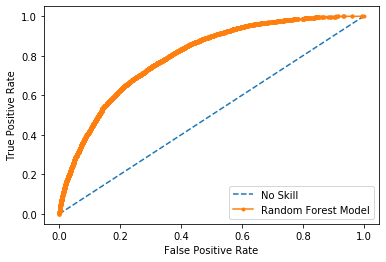

In [17]:
# Plot the ROC curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Random Forest Model')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

#### G-Mean calculation to select a threshold

In [18]:
# Calculate the G-Mean for each threshold
# If G-Mean is optimized, it reflects the best balance between sensitivity and specificity
gmeans = sqrt(tpr * (1-fpr))

In [19]:
# Locate the index of the largest G-Mean to find the best threshold
ix = argmax(gmeans)
print('Best Threshold:%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold:0.457136, G-Mean=0.720


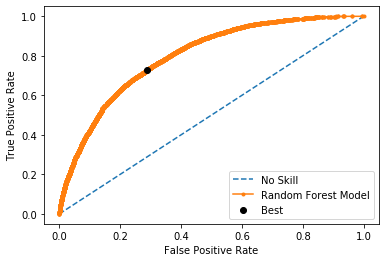

In [20]:
# Plot the ROC curve with the best sensitivity/specificity pair marked
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill', zorder=1)
pyplot.plot(fpr, tpr, marker='.', label='Random Forest Model', zorder=2)
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best', zorder=3)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

#### Youden's J statistic to select a threshold

In [21]:
# Calculate Youden's J statistic for all thresholds
J = tpr-fpr
# Locate the index of the largest J to find the best threshold
ix = argmax(J)
print('Best Threshold=%f, J-Stat=%.3f' % (thresholds[ix], J[ix]))

Best Threshold=0.450625, J-Stat=0.441


#### F1 score to select a threshold

In [22]:
# Calculate PR curve
precision, recall, thresholds = precision_recall_curve(y_val, rf_val_prob1)

In [23]:
no_skill = len(y_val[y_val==1]) / len(y_val)
no_skill

1.0

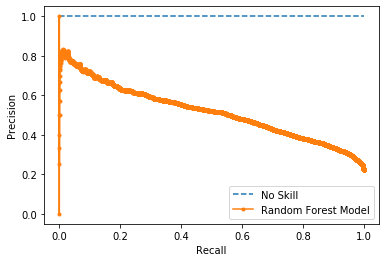

In [24]:
# Plot the PR ROC curve for the model
no_skill = len(y_val[y_val==1]) / len(y_val)
pyplot.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill', zorder=1)
pyplot.plot(recall, precision, marker='.', label='Random Forest Model', zorder=2)
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()

In [25]:
# Calculate F-score
fscore = (2*precision*recall)/(precision+recall)
# Locate the index of the largest F to find the best threshold
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.808941, F-Score=nan


In [26]:
fscore

array([0.36237328, 0.36228901, 0.36230765, ..., 0.0005677 ,        nan,
       0.        ])

In [27]:
# Get rid of the NaN in the fscore array (when precision and recall are both 0)
fscore = np.nan_to_num(fscore, nan=-9999)

In [28]:
fscore

array([ 3.62373283e-01,  3.62289008e-01,  3.62307653e-01, ...,
        5.67697985e-04, -9.99900000e+03,  0.00000000e+00])

In [29]:
# Locate the index of the largest F to find the best threshold
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.491596, F-Score=0.538


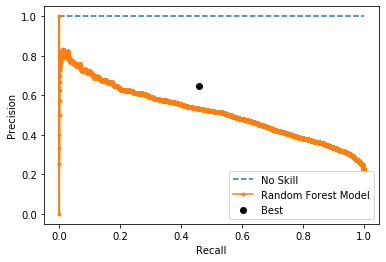

In [30]:
# Plot the PR ROC curve for the model with best precision/recall pair
no_skill = len(y_val[y_val==1]) / len(y_val)
pyplot.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill', zorder=1)
pyplot.plot(recall, precision, marker='.', label='Random Forest Model', zorder=2)
pyplot.scatter(precision[ix], recall[ix], marker='o', color='black', label='Best', zorder=3)
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()

Why is the best precision/recall not on the line?

#### Sklearn metrics f1_score procedure to select a threshold

In [31]:
# Create to_labels function
def to_labels(pos_probs, threshold):
    return(pos_probs <= threshold).astype('int')

In [32]:
# Select best threshold by testing a defined range of values
thresholds = arange(0, 1, 0.001)
# Evaluate each threshold
scores = [f1_score(y_val, to_labels(rf_val_prob1, t)) for t in thresholds]
# scores has no NaN values
# Get the best threshold
ix = argmax(scores)
print('Best Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Best Threshold=0.802, F-Score=0.36076


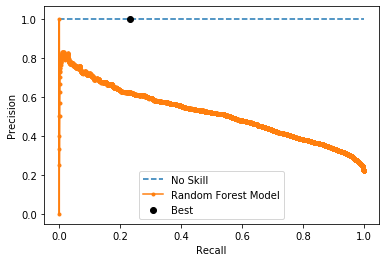

In [33]:
# Plot the PR ROC curve for the model with best precision/recall pair
no_skill = len(y_val[y_val==1]) / len(y_val)
pyplot.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill', zorder=1)
pyplot.plot(recall, precision, marker='.', label='Random Forest Model', zorder=2)
pyplot.scatter(precision[ix], recall[ix], marker='o', color='black', label='Best', zorder=3)
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()

Why is the best precision/recall not on the line?

#### Evaluate the model at two thresholds: 0.267 from f-score using model thresholds and 0.602 from f1_score procedure using defined range of thresholds

In [34]:
rf_prob_cols = ['Prob0', 'Prob1']

In [35]:
rf_preds_train = pd.DataFrame(rf_train_probs, columns = rf_prob_cols)
rf_preds_val = pd.DataFrame(rf_val_probs, columns = rf_prob_cols)
rf_preds_train.head()

,Prob0,Prob1
0,0.800378,0.199622
1,0.793288,0.206712
2,0.354543,0.645457
3,0.490285,0.509715
4,0.537412,0.462588


In [36]:
rf_preds_train['Predicted Class'] = rf_preds_train['Prob1'].apply(lambda x: 1 if x >= 0.45 else 0)
rf_preds_train.head()

,Prob0,Prob1,Predicted Class
0,0.800378,0.199622,0
1,0.793288,0.206712,0
2,0.354543,0.645457,1
3,0.490285,0.509715,1
4,0.537412,0.462588,1


In [37]:
# Confusion matrix with 0.45 as threshold
con_matx = pd.crosstab(y_train['abnormLOS'], rf_preds_train['Predicted Class'],
            rownames=['True'], colnames=['Predicted'], margins=True)
con_matx

Predicted,0,1,All
True,,,
0,34957,15272,50229
1,8008,29663,37671
All,42965,44935,87900


In [38]:
# Accuracy at threshold 0.45
accuracy = (con_matx[0][0]+con_matx[1][1])/(len(y_train))
accuracy

0.7351535836177474

In [39]:
rf_preds_val['Predicted Class'] = rf_preds_val['Prob1'].apply(lambda x: 1 if x >= 0.45 else 0)
rf_preds_val.head()

,Prob0,Prob1,Predicted Class
0,0.839283,0.160717,0
1,0.697972,0.302028,0
2,0.571058,0.428942,0
3,0.583999,0.416001,0
4,0.638824,0.361176,0


In [40]:
# Confusion matrix with 0.45 as threshold
con_matx = pd.crosstab(y_val['abnormLOS'], rf_preds_val['Predicted Class'],
            rownames=['True'], colnames=['Predicted'], margins=True)
con_matx

Predicted,0,1,All
True,,,
0,8622,3857,12479
1,880,2641,3521
All,9502,6498,16000


In [41]:
# Accuracy at threshold 0.45 - a significant improvement with oversampling (was 0.55)
accuracy = (con_matx[0][0]+con_matx[1][1])/(len(y_val))
accuracy

0.7039375

### Predict with Test set

In [42]:
x_test_dummy = x_test.drop(['ID_tmp'], axis=1)

In [43]:
rf_test_probs = rf_clf.predict_proba(x_test_dummy)

In [44]:
rf_preds_test = pd.DataFrame(rf_test_probs, columns = rf_prob_cols)

In [45]:
rf_preds_test

,Prob0,Prob1
0,0.544337,0.455663
1,0.434426,0.565574
2,0.403826,0.596174
3,0.714687,0.285313
4,0.731758,0.268242
...,...,...
11197,0.339571,0.660429
11198,0.631134,0.368866
11199,0.519340,0.480660
11200,0.352013,0.647987


In [46]:
rf_preds_test['Predicted Class'] = rf_preds_test['Prob1'].apply(lambda x: 1 if x >= 0.45 else 0)
rf_preds_test.head()

,Prob0,Prob1,Predicted Class
0,0.544337,0.455663,1
1,0.434426,0.565574,1
2,0.403826,0.596174,1
3,0.714687,0.285313,0
4,0.731758,0.268242,0


In [47]:
rf_preds_test['ID1'] = x_test['ID_tmp']
rf_preds_test.head()

,Prob0,Prob1,Predicted Class,ID1
0,0.544337,0.455663,1,1
1,0.434426,0.565574,1,2
2,0.403826,0.596174,1,3
3,0.714687,0.285313,0,4
4,0.731758,0.268242,0,5


### SHAP to explain the model

In [49]:
rf_shap_explainer = shap.TreeExplainer(rf_clf)

In [51]:
expected_value = rf_shap_explainer.expected_value
expected_value

array([0.57143345, 0.42856655])

In [52]:
row_to_show = 5
data_for_pred = x_val.iloc[row_to_show]
data_for_pred

SCHED_SURG_PROC_CD          -0.306730
FEMALE                       0.383247
AGE_ON_CONTACT_DATE          0.352508
BMI                          0.583237
WEIGHT                       0.784747
                               ...   
CAV_REC_DISP_CODE_TE.VIN    -0.003536
CAV_REC_DISP_CODE_TR        -0.005000
CAV_REC_DISP_CODE_U         -0.077285
CAV_REC_DISP_CODE_Unknown   -0.598007
CAV_REC_DISP_CODE_X         -0.003536
Name: 5, Length: 510, dtype: float64

In [53]:
data_for_pred_arry = data_for_pred.values.reshape(1, -1)
data_for_pred_arry

array([[-3.06729649e-01,  3.83246832e-01,  3.52508211e-01,
         5.83236885e-01,  7.84747495e-01,  5.42076061e-01,
         5.61784295e-01,  9.17421860e-01,  3.84344805e-01,
         3.84644517e-01,  3.84011745e-01,  3.81943503e-01,
         3.81990882e-01,  3.81991485e-01,  3.81104299e-01,
         3.84361250e-01,  3.81622621e-01,  3.81901160e-01,
         3.81933175e-01,  3.84205206e-01,  3.81420713e-01,
         3.83893320e-01,  3.81676223e-01,  3.80979403e-01,
         3.81820137e-01,  3.81822331e-01,  3.81988687e-01,
         3.81892339e-01,  3.84770396e-01,  3.81502263e-01,
         3.81589454e-01,  3.84462767e-01,  3.81990624e-01,
         3.84451315e-01,  3.81977283e-01,  3.81943158e-01,
         3.81963211e-01,  3.84504230e-01,  3.81987999e-01,
         3.81892253e-01,  3.81954863e-01,  3.81904602e-01,
         3.81952625e-01,  3.81991571e-01,  3.81920438e-01,
         3.81787652e-01,  3.81832357e-01,  3.81955293e-01,
         3.81975476e-01,  3.81969408e-01,  3.81910713e-0

In [56]:
rf_shap_values = rf_shap_explainer.shap_values(data_for_pred_arry)

In [57]:
shap.initjs()
shap.force_plot(rf_shap_explainer.expected_value[1], rf_shap_values[1], data_for_pred)

In [ ]:
rf_shap_vals_train = rf_shap_explainer.shap_values(x_train)

In [ ]:
rf_shap_vals_val = rf_shap_explainer.shap_values(x_val)

In [ ]:
shap.summary_plot(rf_shap_vals_train[1], x_train)

In [ ]:
shap.summary_plot(rf_shap_vals_val[1], x_val)

# LightGBM with Hyperband

In [7]:
y_val[y_val['abnormLOS']==1].shape[0] / y_val[y_val['abnormLOS']==0].shape[0]

0.28215401875150253

In [4]:
hb_lgb_model = lgb.LGBMClassifier()

lgb_hb_param_dict = {'boosting_type' : ['gbdt'],
                    'num_leaves' : np.arange(2, 251),
                    'max_depth' : np.arange(2, 251),
                    'learning_rate' : [0.001, 0.005, 0.01, 0.02, 0.03],
                    'n_estimators' : np.arange(50, 501),
                    #subsample_for_bin : [],
                    'objective' : ['binary'],
                    #'class_weight' : [],
                    #'min_split_gain' : [],
                    #'min_child_weight' : [],
                    'min_child_samples' : [20, 30, 40, 50],
                    #'subsample' : [],
                    #'subsample_freq' : [],
                    #'colsample_bytree' : [],
                    'scale_pos_weight' : [0.28],
                    'reg_alpha' : np.arange(0.1, 2, 0.05),
                    'reg_lambda' : np.arange(0.1, 2, 0.05),
                    'n_jobs' : [-1]
                    }

In [572]:
search = HyperbandSearchCV(hb_lgb_model, lgb_hb_param_dict, cv=3,
                           verbose = 1,
                           max_iter=200,min_iter=50,
                           scoring='f1_macro')

In [573]:
#search.fit(x_over_dummy,y_over)

Starting bracket 1 (out of 2) of hyperband
Starting successive halving iteration 1 out of 2. Fitting 3 configurations, with resource_param n_estimators set to 66, and keeping the best 1 configurations.
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/lisaover/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lisaover/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lisaover/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lisaover/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in 

Starting successive halving iteration 2 out of 2. Fitting 1 configurations, with resource_param n_estimators set to 200
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   54.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Starting bracket 2 (out of 2) of hyperband
Starting successive halving iteration 1 out of 1. Fitting 2 configurations, with resource_param n_estimators set to 200
Fitting 3 folds for each of 2 candidates, totalling 6 fits


/Users/lisaover/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lisaover/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lisaover/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.5min finished


HyperbandSearchCV(cv=3, error_score='raise',
                  estimator=LGBMClassifier(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=None,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           s...
                                       'reg_lambda': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65

In [574]:
#search.best_params_

{'scale_pos_weight': 0.28,
 'reg_lambda': 1.3000000000000005,
 'reg_alpha': 1.1000000000000005,
 'objective': 'binary',
 'num_leaves': 228,
 'n_jobs': -1,
 'n_estimators': 200,
 'min_child_samples': 30,
 'max_depth': 246,
 'learning_rate': 0.01,
 'boosting_type': 'gbdt'}

In [575]:
# AUC train 0.86; AUC val 0.70
lgb_params = {
 'scale_pos_weight': 0.28,
 'reg_lambda': 1.3,
 'reg_alpha': 1.1,
 'objective': 'binary',
 'num_leaves': 228,
 'n_jobs': -1,
 'n_estimators': 200,
 'min_child_samples': 30,
 'max_depth': 246,
 'learning_rate': 0.01,
 'boosting_type': 'gbdt'
}

In [180]:
# AUC train 0.8392; AUC val 0.6423
lgb_params = {
 #'scale_pos_weight': 0.28,
 'reg_lambda': 1.20,
 'reg_alpha': 1.75,
 'objective': 'binary',
 'num_leaves': 201,
 'n_jobs': -1,
 'n_estimators': 200,
 'min_child_samples': 50,
 'max_depth': 10,
 'learning_rate': 0.001,
 'boosting_type': 'gbdt'
}

In [594]:
# AUC train 0.8440; AUC val 0.6416
lgb_params = {
 #'scale_pos_weight': 0.28,
 'reg_lambda': 1.2,
 'reg_alpha': 1.75,
 'objective': 'binary',
 'num_leaves': 201,
 'n_jobs': -1,
 'n_estimators': 200,
 'min_child_samples': 40,
 'max_depth': 14,
 'learning_rate': 0.001,
 'boosting_type': 'gbdt'
}

In [202]:
# AUC train 0.8098; AUC val 0.7858
lgb_params = {
 'scale_pos_weight': 0.28,
 'reg_lambda': 1.5,
 'reg_alpha': 2,
 'objective': 'binary',
 'num_leaves': 228,
 'n_jobs': -1,
 'n_estimators': 200,
 'min_child_samples': 40,
 'max_depth': 10,
 'learning_rate': 0.001,
 'boosting_type': 'gbdt'
}

#### Best fit

In [8]:
# AUC train 0.8371; AUC val 0.8070
lgb_params = {
 'scale_pos_weight': 0.28,
 'reg_lambda': 1.5,
 'reg_alpha': 2,
 'objective': 'binary',
 'num_leaves': 228,
 'n_jobs': -1,
 'n_estimators': 200,
 'min_child_samples': 40,
 'max_depth': 10,
 'learning_rate': 0.001,
 'boosting_type': 'gbdt'
}

In [9]:
lgb_mort_train = lgb.Dataset(x_train, y_train)
lgb_val_train = lgb.Dataset(x_val, y_val)

In [10]:
lgb_gbm = lgb.train(params = lgb_params, train_set = lgb_mort_train,
                num_boost_round = 100, valid_sets = [lgb_val_train, lgb_mort_train],
               valid_names = ['Evaluation', 'Train'])

[1]	Train's binary_logloss: 0.682677	Evaluation's binary_logloss: 0.622572
[2]	Train's binary_logloss: 0.682448	Evaluation's binary_logloss: 0.622225
[3]	Train's binary_logloss: 0.68222	Evaluation's binary_logloss: 0.621879
[4]	Train's binary_logloss: 0.681991	Evaluation's binary_logloss: 0.621533
[5]	Train's binary_logloss: 0.681764	Evaluation's binary_logloss: 0.621188
[6]	Train's binary_logloss: 0.681537	Evaluation's binary_logloss: 0.620844
[7]	Train's binary_logloss: 0.68131	Evaluation's binary_logloss: 0.6205
[8]	Train's binary_logloss: 0.681084	Evaluation's binary_logloss: 0.620158
[9]	Train's binary_logloss: 0.680858	Evaluation's binary_logloss: 0.619816
[10]	Train's binary_logloss: 0.680633	Evaluation's binary_logloss: 0.619475
[11]	Train's binary_logloss: 0.680409	Evaluation's binary_logloss: 0.619135
[12]	Train's binary_logloss: 0.680183	Evaluation's binary_logloss: 0.618794
[13]	Train's binary_logloss: 0.679958	Evaluation's binary_logloss: 0.618453
[14]	Train's binary_loglo

[109]	Train's binary_logloss: 0.660445	Evaluation's binary_logloss: 0.588489
[110]	Train's binary_logloss: 0.660261	Evaluation's binary_logloss: 0.588202
[111]	Train's binary_logloss: 0.660078	Evaluation's binary_logloss: 0.587917
[112]	Train's binary_logloss: 0.659893	Evaluation's binary_logloss: 0.587633
[113]	Train's binary_logloss: 0.659712	Evaluation's binary_logloss: 0.587347
[114]	Train's binary_logloss: 0.659529	Evaluation's binary_logloss: 0.587063
[115]	Train's binary_logloss: 0.659347	Evaluation's binary_logloss: 0.586778
[116]	Train's binary_logloss: 0.659165	Evaluation's binary_logloss: 0.586496
[117]	Train's binary_logloss: 0.658981	Evaluation's binary_logloss: 0.586213
[118]	Train's binary_logloss: 0.658802	Evaluation's binary_logloss: 0.58593
[119]	Train's binary_logloss: 0.65862	Evaluation's binary_logloss: 0.58565
[120]	Train's binary_logloss: 0.658438	Evaluation's binary_logloss: 0.585365
[121]	Train's binary_logloss: 0.658261	Evaluation's binary_logloss: 0.585085
[1

In [11]:
lgb_train_probs = lgb_gbm.predict(x_train)
lgb_val_probs = lgb_gbm.predict(x_val)
lgb_train_probs

array([0.35778857, 0.35819603, 0.40962193, ..., 0.4539885 , 0.43821995,
       0.44537542])

In [12]:
lgb_preds_train = pd.DataFrame(lgb_train_probs, columns = ['Prob1'])
lgb_preds_val = pd.DataFrame(lgb_val_probs, columns = ['Prob1'])
lgb_preds_val.head()

,Prob1
0,0.358196
1,0.365031
2,0.380443
3,0.366317
4,0.375968


In [13]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, lgb_train_probs)
train_auc = metrics.auc(fpr, tpr)
train_auc

0.8371050498726188

In [14]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, lgb_val_probs)
val_auc = metrics.auc(fpr, tpr)
val_auc

0.8070464827943037

In [15]:
train_auc - val_auc

0.030058567078315113

In [16]:
# Calculate the G-Mean for each threshold
# If G-Mean is optimized, it reflects the best balance between sensitivity and specificity
gmeans = sqrt(tpr * (1-fpr))

In [17]:
# Locate the index of the largest G-Mean to find the best threshold
ix = argmax(gmeans)
print('Best Threshold:%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold:0.384610, G-Mean=0.729


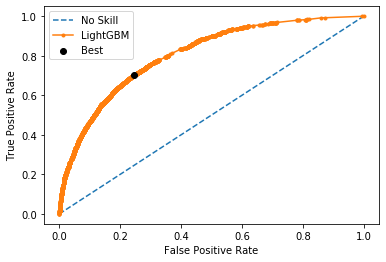

In [18]:
# Plot the ROC curve with the best sensitivity/specificity pair marked
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill', zorder=1)
pyplot.plot(fpr, tpr, marker='.', label='LightGBM', zorder=2)
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best', zorder=3)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [19]:
# Calculate Youden's J statistic for all thresholds
J = tpr-fpr
# Locate the index of the largest J to find the best threshold
ix = argmax(J)
print('Best Threshold=%f, J-Stat=%.3f' % (thresholds[ix], J[ix]))

Best Threshold=0.384876, J-Stat=0.458


In [20]:
# Calculate PR curve
precision, recall, thresholds = precision_recall_curve(y_val, lgb_val_probs)

In [21]:
# Calculate F-score
fscore = (2*precision*recall)/(precision+recall)
# Locate the index of the largest F to find the best threshold
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.390975, F-Score=0.551


In [22]:
# Get rid of the NaN in the fscore array (when precision and recall are both 0)
fscore = np.nan_to_num(fscore, nan=-9999)

In [23]:
# Locate the index of the largest F to find the best threshold
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.390975, F-Score=0.551


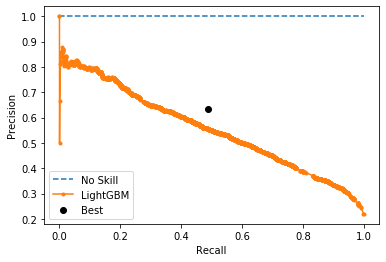

In [24]:
# Plot the PR ROC curve for the model with best precision/recall pair
no_skill = len(y_val[y_val==1]) / len(y_val)
pyplot.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill', zorder=1)
pyplot.plot(recall, precision, marker='.', label='LightGBM', zorder=2)
pyplot.scatter(precision[ix], recall[ix], marker='o', color='black', label='Best', zorder=3)
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()

In [28]:
lgb_preds_train['Predicted Class'] = lgb_preds_train['Prob1'].apply(lambda x: 1 if x >= 0.39 else 0)
lgb_preds_train.head()

,Prob1,Predicted Class
0,0.357789,0
1,0.358196,0
2,0.409622,1
3,0.428349,1
4,0.361875,0


In [30]:
# Confusion matrix with 0.39 as threshold
con_matx = pd.crosstab(y_train['abnormLOS'], lgb_preds_train['Predicted Class'],
            rownames=['True'], colnames=['Predicted'], margins=True)
con_matx

Predicted,0,1,All
True,,,
0,40683,9546,50229
1,11563,26108,37671
All,52246,35654,87900


In [31]:
# Accuracy at threshold 0.39 is 
accuracy = (con_matx[0][0]+con_matx[1][1])/len(y_train)
accuracy

0.7598521046643913

In [32]:
lgb_preds_val['Predicted Class'] = lgb_preds_val['Prob1'].apply(lambda x: 1 if x >= 0.39 else 0)
lgb_preds_val.head()

,Prob1,Predicted Class
0,0.358196,0
1,0.365031,0
2,0.380443,0
3,0.366317,0
4,0.375968,0


In [34]:
# Confusion matrix with 0.39 as threshold
con_matx = pd.crosstab(y_val['abnormLOS'], lgb_preds_val['Predicted Class'],
            rownames=['True'], colnames=['Predicted'], margins=True)
con_matx

Predicted,0,1,All
True,,,
0,10015,2464,12479
1,1252,2269,3521
All,11267,4733,16000


In [35]:
# Accuracy at threshold 0.52 is 
accuracy = (con_matx[0][0]+con_matx[1][1])/len(y_val)
accuracy

0.76775

### Predict with Test

In [36]:
x_test_dummy = x_test.drop(['ID_tmp'], axis=1)

In [37]:
lgb_test_probs = lgb_gbm.predict(x_test_dummy)

In [38]:
lgb_preds_test = pd.DataFrame(lgb_test_probs, columns = ['Prob1'])
lgb_preds_test

,Prob1
0,0.386888
1,0.409625
2,0.442254
3,0.405047
4,0.354753
...,...
11197,0.422695
11198,0.401968
11199,0.375720
11200,0.451721


In [39]:
lgb_preds_test['Predicted Class'] = lgb_preds_test['Prob1'].apply(lambda x: 1 if x >= 0.39 else 0)
lgb_preds_test.head()

,Prob1,Predicted Class
0,0.386888,0
1,0.409625,1
2,0.442254,1
3,0.405047,1
4,0.354753,0


In [40]:
lgb_preds_test['ID1'] = x_test['ID_tmp']
lgb_preds_test.head()

,Prob1,Predicted Class,ID1
0,0.386888,0,1
1,0.409625,1,2
2,0.442254,1,3
3,0.405047,1,4
4,0.354753,0,5


In [41]:
# Write predicted probablities and ID1 to file
lgb_preds_test.to_csv(r'x_test_preds.csv')

### SHAP to explain the model

In [42]:
lgb_shap_explainer = shap.TreeExplainer(lgb_gbm)

In [43]:
expected_value = lgb_shap_explainer.expected_value
expected_value

array([-0.43533849])

In [44]:
row_to_show = 5
data_for_pred = x_val.iloc[row_to_show]
data_for_pred

SCHED_SURG_PROC_CD          -0.306730
FEMALE                       0.383247
AGE_ON_CONTACT_DATE          0.352508
BMI                          0.583237
WEIGHT                       0.784747
                               ...   
CAV_REC_DISP_CODE_TE.VIN    -0.003536
CAV_REC_DISP_CODE_TR        -0.005000
CAV_REC_DISP_CODE_U         -0.077285
CAV_REC_DISP_CODE_Unknown   -0.598007
CAV_REC_DISP_CODE_X         -0.003536
Name: 5, Length: 510, dtype: float64

In [45]:
data_for_pred_arry = data_for_pred.values.reshape(1, -1)
data_for_pred_arry

array([[-3.06729649e-01,  3.83246832e-01,  3.52508211e-01,
         5.83236885e-01,  7.84747495e-01,  5.42076061e-01,
         5.61784295e-01,  9.17421860e-01,  3.84344805e-01,
         3.84644517e-01,  3.84011745e-01,  3.81943503e-01,
         3.81990882e-01,  3.81991485e-01,  3.81104299e-01,
         3.84361250e-01,  3.81622621e-01,  3.81901160e-01,
         3.81933175e-01,  3.84205206e-01,  3.81420713e-01,
         3.83893320e-01,  3.81676223e-01,  3.80979403e-01,
         3.81820137e-01,  3.81822331e-01,  3.81988687e-01,
         3.81892339e-01,  3.84770396e-01,  3.81502263e-01,
         3.81589454e-01,  3.84462767e-01,  3.81990624e-01,
         3.84451315e-01,  3.81977283e-01,  3.81943158e-01,
         3.81963211e-01,  3.84504230e-01,  3.81987999e-01,
         3.81892253e-01,  3.81954863e-01,  3.81904602e-01,
         3.81952625e-01,  3.81991571e-01,  3.81920438e-01,
         3.81787652e-01,  3.81832357e-01,  3.81955293e-01,
         3.81975476e-01,  3.81969408e-01,  3.81910713e-0

In [46]:
lgb_shap_values = lgb_shap_explainer.shap_values(data_for_pred_arry)

In [54]:
shap.initjs()
force = shap.force_plot(lgb_shap_explainer.expected_value[1], lgb_shap_values[1], data_for_pred)
force

In [56]:
# This prints a blank figure
plt.savefig('force_plot.png')

<Figure size 432x288 with 0 Axes>

In [48]:
lgb_shap_vals_train = lgb_shap_explainer.shap_values(x_train)

In [49]:
lgb_shap_vals_val = lgb_shap_explainer.shap_values(x_val)

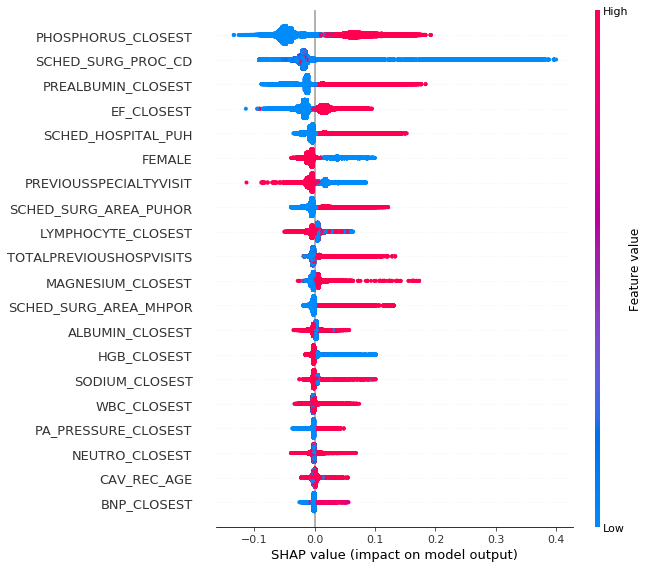

In [51]:
shap.initjs()
shap.summary_plot(lgb_shap_vals_train[1], x_train)

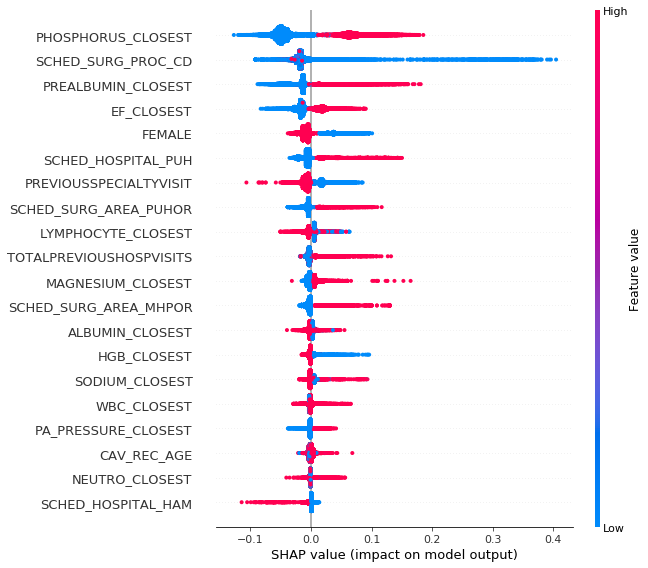

In [52]:
shap.initjs()
shap.summary_plot(lgb_shap_vals_val[1], x_val)

# XGBoost with Hyperopt

In [209]:
dtrain = xgb.DMatrix(data = x_train, label = y_train)
dval = xgb.DMatrix(data = x_val, label = y_val)

In [231]:
xgb_space = {
    'booster': hp.choice('booster',  ['gbtree']),
    'eta': hp.loguniform('learning_rate', -4, 0),
    'max_depth':hp.choice('max_depth', np.arange(10, 300,1, dtype=int)),
    'subsample':hp.quniform('subsample',0.5,1.0,0.05),
    'colsample_bytree':hp.quniform('colsample_bytree',0.5,1.0,0.05),
    'min_child_weight':hp.quniform('min_child_weight', 100, 1000,100),
    'lambda': hp.uniform('reg_alpha', 0.0, 1000.0),
    'alpha': hp.uniform('reg_lambda', 0.0, 1000.0),
    'scale_pos_weight': hp.uniform('scale_pos_weight', 6.0, 10.0),
    'eval_metric' : hp.choice('eval_metric', ['auc']),
    'n_thread': hp.choice('n_thread', [-1]),
    'verbose' : hp.choice('verbose', [-1]),
    'maximize' : hp.choice('maximize', ['TRUE'])
    }

In [605]:
"""
def objective_m(params, n_folds=5):


    model = xgb.cv(params = params,
              dtrain = dtrain,
              num_boost_round = 10,
              early_stopping_rounds = 10,
             nfold = n_folds)
  
    
  
    # returns the best average loss on validation set 
    
    loss = 1 - max(model['test-auc-mean'])
    return loss


bayes_trials = Trials()
MAX_EVALS = 10 # this controls the runtime 

xgb_best_m = fmin(fn = objective_m, space = xgb_space, algo = tpe.suggest, 
max_evals = MAX_EVALS, trials = bayes_trials)
"""

100%|██████████| 10/10 [10:27<00:00, 62.72s/it, best loss: 0.2022294]         


In [606]:
#xgb_best_m

{'booster': 0,
 'colsample_bytree': 0.75,
 'eval_metric': 0,
 'learning_rate': 0.14549851545016926,
 'max_depth': 16,
 'maximize': 0,
 'min_child_weight': 900.0,
 'n_thread': 0,
 'reg_alpha': 805.3947036959058,
 'reg_lambda': 121.76259941293166,
 'scale_pos_weight': 9.268925857926515,
 'subsample': 0.9500000000000001,
 'verbose': 0}

In [ ]:
# AUC train 0.8701; val 0.8398
param = {'max_depth':217,
         'objective':'binary:logistic',
         'eval_metric': 'auc'
         ,'lambda': 21.52956601821676
         ,'alpha': 103.42203155447261
         ,'min_child_weight': 500
         ,'colsample_bytree' : 0.7000000000000001
         ,'scale_pos_weight' : 6.710735480812482
         ,'maximize' : 'TRUE'
        }

In [616]:
# AUC train 0.8089; val 0.7767
param = {#'booster': 0,
 'colsample_bytree': 0.75,
 'eval_metric': 'auc',
 'learning_rate': 0.14549851545016926,
 'max_depth': 16,
 'maximize': True,
 'min_child_weight': 900.0,
 #'n_thread': 0,
 'reg_alpha': 805.3947036959058,
 'reg_lambda': 121.76259941293166,
 'scale_pos_weight': 9.268925857926515,
 'subsample': 0.9500000000000001,
 'verbose': True}

#### Best fit

In [210]:
# AUC train 0.7818; val 0.7714
param = {'booster': 'dart',
 'colsample_bytree': 0.75,
 'eval_metric': 'auc',
 'learning_rate': 0.014549851545016926,
 'max_depth': 16,
 'maximize': True,
 'min_child_weight': 900.0,
 'n_thread': 2,
 'reg_alpha': 805.3947036959058,
 'reg_lambda': 121.76259941293166,
 'scale_pos_weight': 9.268925857926515,
 'subsample': 0.9500000000000001,
 'verbose': True}

In [211]:
# specify validations set to watch performance
watchlist = [(dtrain, 'train'), (dval, 'eval')]
num_round = 100
bst_auc = xgb.train(param, dtrain, num_round, watchlist, early_stopping_rounds = 10)

[0]	train-auc:0.716521	eval-auc:0.705767
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[1]	train-auc:0.721959	eval-auc:0.710982
[2]	train-auc:0.723758	eval-auc:0.712455
[3]	train-auc:0.724372	eval-auc:0.713127
[4]	train-auc:0.727862	eval-auc:0.717474
[5]	train-auc:0.727843	eval-auc:0.718139
[6]	train-auc:0.728106	eval-auc:0.718751
[7]	train-auc:0.728383	eval-auc:0.719111
[8]	train-auc:0.730653	eval-auc:0.721236
[9]	train-auc:0.730254	eval-auc:0.720778
[10]	train-auc:0.730831	eval-auc:0.721764
[11]	train-auc:0.730964	eval-auc:0.721843
[12]	train-auc:0.731384	eval-auc:0.722221
[13]	train-auc:0.73158	eval-auc:0.722305
[14]	train-auc:0.731639	eval-auc:0.722371
[15]	train-auc:0.731731	eval-auc:0.722511
[16]	train-auc:0.732784	eval-auc:0.723689
[17]	train-auc:0.732809	eval-auc:0.723633
[18]	train-auc:0.733118	eval-auc:0.723683
[19]	train-auc:0.733127	eval-auc:0.723905
[20]	train-auc:0.733191	eval-a

In [212]:
xgb_train_probs = bst_auc.predict(dtrain)
xgb_val_probs = bst_auc.predict(dval)
xgb_train_probs

array([0.64301497, 0.6177087 , 0.8254868 , ..., 0.8357421 , 0.8212188 ,
       0.79667753], dtype=float32)

In [213]:
xgb_prob_cols = ['Prob1']

In [214]:
xgb_preds_train = pd.DataFrame(xgb_train_probs, columns = xgb_prob_cols)
xgb_preds_val = pd.DataFrame(xgb_val_probs, columns = xgb_prob_cols)
xgb_preds_train.head()

,Prob1
0,0.643015
1,0.617709
2,0.825487
3,0.792723
4,0.755115


In [215]:
best_preds_trn = np.asarray([np.argmax(line) for line in xgb_train_probs])
best_preds_val = np.asarray([np.argmax(line) for line in xgb_val_probs])

In [216]:
best_preds_df_train = pd.DataFrame(best_preds_trn).add_prefix('PROB')

best_preds_df_val = pd.DataFrame(best_preds_val).add_prefix('PROB')
best_preds_df_val.head()

,PROB0
0,0
1,0
2,0
3,0
4,0


In [217]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, xgb_train_probs)
train_auc = metrics.auc(fpr, tpr)
train_auc

0.7818062359366627

In [218]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, xgb_val_probs)
train_auc = metrics.auc(fpr, tpr)
train_auc

0.7713891004026783

In [219]:
# Calculate the G-Mean for each threshold
# If G-Mean is optimized, it reflects the best balance between sensitivity and specificity
gmeans = sqrt(tpr * (1-fpr))

In [220]:
# Locate the index of the largest G-Mean to find the best threshold
ix = argmax(gmeans)
print('Best Threshold:%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold:0.783377, G-Mean=0.702


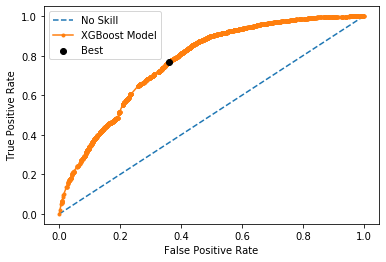

In [221]:
# Plot the ROC curve with the best sensitivity/specificity pair marked
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill', zorder=1)
pyplot.plot(fpr, tpr, marker='.', label='XGBoost Model', zorder=2)
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best', zorder=3)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [222]:
# Calculate Youden's J statistic for all thresholds
J = tpr-fpr
# Locate the index of the largest J to find the best threshold
ix = argmax(J)
print('Best Threshold=%f, J-Stat=%.3f' % (thresholds[ix], J[ix]))

Best Threshold=0.748834, J-Stat=0.417


In [223]:
# Calculate PR curve
precision, recall, thresholds = precision_recall_curve(y_val, xgb_val_probs)

In [224]:
# Calculate F-score
fscore = (2*precision*recall)/(precision+recall)
# Locate the index of the largest F to find the best threshold
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.783377, F-Score=0.506


In [225]:
# Get rid of the NaN in the fscore array (when precision and recall are both 0)
fscore = np.nan_to_num(fscore, nan=-9999)

In [226]:
# Locate the index of the largest F to find the best threshold
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.783377, F-Score=0.506


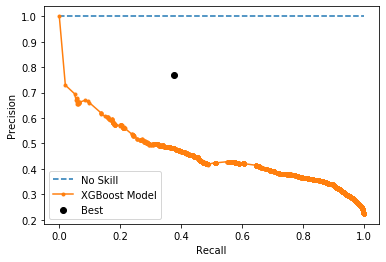

In [227]:
# Plot the PR ROC curve for the model with best precision/recall pair
no_skill = len(y_val[y_val==1]) / len(y_val)
pyplot.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill', zorder=1)
pyplot.plot(recall, precision, marker='.', label='XGBoost Model', zorder=2)
pyplot.scatter(precision[ix], recall[ix], marker='o', color='black', label='Best', zorder=3)
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()

In [232]:
xgb_preds_train['Predicted Class'] = xgb_preds_train['Prob1'].apply(lambda x: 1 if x >= 0.75 else 0)
xgb_preds_train.head()

,Prob1,Predicted Class
0,0.643015,0
1,0.617709,0
2,0.825487,1
3,0.792723,1
4,0.755115,1


In [233]:
# Confusion matrix with 0.75 as threshold
con_matx = pd.crosstab(y_train['abnormLOS'], xgb_preds_train['Predicted Class'],
            rownames=['True'], colnames=['Predicted'], margins=True)
con_matx

Predicted,0,1,All
True,,,
0,28018,22211,50229
1,5220,32451,37671
All,33238,54662,87900


In [235]:
# Accuracy at threshold 0.75 is 
accuracy = (con_matx[0][0]+con_matx[1][1])/len(y_train)
accuracy

0.6879294653014789

In [236]:
xgb_preds_val['Predicted Class'] = xgb_preds_val['Prob1'].apply(lambda x: 1 if x >= 0.75 else 0)
xgb_preds_val.head()

,Prob1,Predicted Class
0,0.587299,0
1,0.711943,0
2,0.820559,1
3,0.741647,0
4,0.818343,1


In [238]:
# Confusion matrix with 0.75 as threshold
con_matx = pd.crosstab(y_val['abnormLOS'], xgb_preds_val['Predicted Class'],
            rownames=['True'], colnames=['Predicted'], margins=True)
con_matx

Predicted,0,1,All
True,,,
0,7048,5431,12479
1,532,2989,3521
All,7580,8420,16000


In [239]:
# Accuracy at threshold 0.75 
accuracy = (con_matx[0][0]+con_matx[1][1])/(len(y_val))
accuracy

0.6273125

# Read Train, Val, and Test sets from files (with cat variables)

In [250]:
# Read in csv files for Python lab - train/validation/test sets
pd.set_option('display.max_columns', None)
x_train = pd.read_csv('x_train_cat.csv')
x_val = pd.read_csv('x_val_cat.csv')
y_train = pd.read_csv('y_train_cat.csv')
y_val = pd.read_csv('y_val_cat.csv')
x_test = pd.read_csv('x_test_cat.csv')

In [251]:
x_train.drop(['Unnamed: 0'], inplace=True, axis=1)
x_val.drop(['Unnamed: 0'], inplace=True, axis=1)
y_train.drop(['Unnamed: 0'], inplace=True, axis=1)
y_val.drop(['Unnamed: 0'], inplace=True, axis=1)
x_test.drop(['Unnamed: 0'], inplace=True, axis=1)

In [253]:
x_test.head()

,SCHED_SURG_AREA,RACE,ETHNIC_GROUP,SCHED_HOSPITAL,SCHED_SURG_PROC_CD,FEMALE,AGE_ON_CONTACT_DATE,BMI,WEIGHT,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,PCPVISIT,METFORMIN_FLAG,OPIOIDS_FLAG,ALPHA_BLOCKERS,CENTRAL_ANTAGONISTS,RENIN,BETA_BLOCKERS,ACE_INHIB,ARB,ALDOSTERONE_BLOCKERS,VASODIALATORS,DIURETICS,CALCIUM_BLOCKERS,STATINS,INSULIN_MEDS,ASPIRIN,WARFARIN,DOACS,PRETERM_17P,MEDROL,PREDNISONE,INHALED_STEROID_WITH_LABA,INHALED_STEROID_WITHOUT_LABA,INHALED_STEROIDS,ASTHMA_BIOLOGICS,SHORT_ACTING_BRONCHO_DIALATORS,TNF_INHIBITORS,IMMUNOMODULATORS,AMINOSALICYLATES,CORTICOSTEROIDS,ARNI,ALLOPURINOL,SEIZURE,MUSCLERELAXANT,DIGOXIN,INOTROPES,ANTI_ARRHYTHMIC,ANTIPLATELET,SULFONYLUREA,GLP_1_AGONIST,THIAZOLIDINEDIONE,SGLT2_INHIBITOR,DPP4_INHIBITOR,ALPHA_GLUCOSIDASE_INHIBITOR,AMYLINOMIMETIC,RAPID_ACTING_INSULIN,SHORT_ACTING_INSULIN,INTERMEDIATE_ACTING_INSULIN,LONG_ACTING_INSULIN,MINOCYCLINE,DOXYCYCLINE,MELATONIN,METHAZOLAMIDE,HYDROXYCHLOROQUINE,ITTC,DMARDS,OBESE_HST,MORBIDOBESE_HST,PH_HST,AFIB_HST,COPD_HST,CHF_HST,DIAB_HST,CAD_HST,OSTEO_HST,HTN_HST,CANCER_HST,LUNG_CANCER_HST,OVARIAN_CANCER_HST,HEAD_NECK_CANCER_HST,BREAST_CANCER_HST,ASTHMA_HST,GERD_HST,FIBROMYALGIA_HST,DEPRESSION_HST,PSORIATIC_ARTHRITIS_HST,RHEUM_ARTHRITIS_HST,LUPUS_HST,VTVF_HST,STROKE_HST,VASCULARDISEASE_HST,LOWBACKPAIN_HST,DVT_HST,PE_HST,HYPOTHYROIDISM_HST,ADRENAL_INSUFFICIENCY_HST,INFERTILITY_HST,CKD_HST,ESRD_HST,OBS_SLEEPAPNEA_HST,CARDIAC_ARREST_HST,HEMO_STROKE_HST,MAJOR_BLEED_HST,MACULAR_DEGEN_HST,ANXIETY_HST,HYPERLIPIDEMIA_HST,HIV_HST,ALZHEIMER_HST,COLORECTAL_CANCER_HST,ENDOMETRIAL_CANCER_HST,GLAUCOMA_HST,HIP_PELVIC_FRACTURE_HST,BENIGN_PROSTATIC_HYPERPLASIA_HST,CIRRHOSIS_HST,CIRRHOSIS_HST_1,CHOLESTEROL_CLOSEST,HDL_CLOSEST,LDL_CLOSEST,TRIG_CLOSEST,WBC_CLOSEST,HGB_CLOSEST,URIC_ACID_CLOSEST,HCO3_CLOSEST,SODIUM_CLOSEST,CREATININE_CLOSEST,EF_CLOSEST,FEV1_CLOSEST,EOS_CLOSEST,NEUTRO_CLOSEST,MONO_CLOSEST,BASOPHIL_CLOSEST,K_CLOSEST,EGFR_CLOSEST,TSH_CLOSEST,T4_CLOSEST,GLUCOSE_CLOSEST,HBA1C_CLOSEST,ESR_CLOSEST,VITAMIN_D_CLOSEST,MAGNESIUM_CLOSEST,FOLICAC_CLOSEST,VIT_B12_CLOSEST,BNP_CLOSEST,PLATELET_CLOSEST,PA_PRESSURE_CLOSEST,HEMATOCRIT_CLOSEST,ALBUMIN_CLOSEST,PREALBUMIN_CLOSEST,MR_CLOSEST,TR_CLOSEST,MEANPLATELETVOL_CLOSEST,MCH_CLOSEST,RDW_CLOSEST,MCV_CLOSEST,MCHC_CLOSEST,RBC_CLOSEST,LYMPHOCYTE_CLOSEST,CA125_CLOSEST,BILIRUBIN_CLOSEST,ALT_CLOSEST,AST_CLOSEST,CA_CLOSEST,PHOSPHORUS_CLOSEST,URINEPROTEIN_CLOSEST,TOTALPREVIOUSHOSPVISITS,TOTALPREVIOUSEDVISITS,TOTALPREVIOUSPCPVISITS,PREVIOUSSPECIALTYVISIT,PREVIOUSURGENTCAREVISIT,CAV_REC_SEX,CAV_REC_LANG,CAV_REC_AGE,CAV_REC_IPOP,CAV_REC_PRIORITY_CODE,CAV_REC_DISP_CODE,UREA_NITROGEN_MAX_1,UREA_NITROGEN_MIN_1,CALCIUM_MAX_1,CALCIUM_MIN_1,IRON_MAX_1,IRON_MIN_1,GLUCOSE_MAX_1,GLUCOSE_MIN_1,HGB_MAX_1,HGB_MIN_1,HEMATOCRIT_MAX_1,HEMATOCRIT_MIN_1,CHLORIDE_MAX_1,CHLORIDE_MIN_1,SODIUM_MAX_1,SODIUM_MIN_1,CREATININE_MAX_1,CREATININE_MIN_1,CARBON_DIOXIDE_MAX_1,CARBON_DIOXIDE_MIN_1,RBC_MAX_1,RBC_MIN_1,MCV_MAX_1,MCV_MIN_1,MCH_MAX_1,MCH_MIN_1,MCHC_MAX_1,MCHC_MIN_1,ANION_GAP_MAX_1,ANION_GAP_MIN_1,PLATELETS_MAX_1,PLATELETS_MIN_1,WBC_MAX_1,WBC_MIN_1,MEAN_PLATELET_VOLUME_MAX_1,MEAN_PLATELET_VOLUME_MIN_1,EGFR_MAX_1,EGFR_MIN_1,RDW_MAX_1,RDW_MIN_1,BASOPHILS_MAX_1,BASOPHILS_MIN_1,NEUTROPHILS_MAX_1,NEUTROPHILS_MIN_1,LYMPHOCYTES_MAX_1,LYMPHOCYTES_MIN_1,MONOCYTES_MAX_1,MONOCYTES_MIN_1,EOSINOPHILS_MAX_1,EOSINOPHILS_MIN_1,MAGNESIUM_MAX_1,MAGNESIUM_MIN_1,PHOSPHORUS_MAX_1,PHOSPHORUS_MIN_1,INR_MAX_1,INR_MIN_1,ALBUMIN_MAX_1,ALBUMIN_MIN_1,TOTAL_BILIRUBIN_MAX_1,TOTAL_BILIRUBIN_MIN_1,AST_MAX_1,AST_MIN_1,ALT_MAX_1,ALT_MIN_1,ALKALINE_PHOSPHATASE_MAX_1,ALKALINE_PHOSPHATASE_MIN_1,TOTAL_PROTEIN_MAX_1,TOTAL_PROTEIN_MIN_1,BUN_CREATININE_RATIO_MAX_1,ACTIVATED_PTT_MAX_1,BUN_CREATININE_RATIO_MIN_1,ACTIVATED_PTT_MIN_1,TROPONIN_I_MAX_1,TROPONIN_I_MIN_1,SPECIFIC_GRAVITY_URINE_MAX_1,SPECIFIC_GRAVITY_URINE_MIN_1,PROTEIN_URINE_MAX_1,PROTEIN_URINE_MIN_1,PH_URINE_MAX_1,PH_URINE_MIN_1,KETONES_URINE_MAX_1,KETONES_URINE_MIN_1,URINE_NITRITE_MAX_1,URINE_NITRITE_MIN_1,LEUKOCYTE_ESTERASE_MAX_1,LEUKOCYTE_ESTERASE_MIN_1

# CatBoost with Hyperopt

##### Tutorials
https://www.kaggle.com/prashant111/catboost-classifier-tutorial<BR>
https://www.kaggle.com/manrunning/catboost-for-titanic-top-7<BR>
https://www.kaggle.com/redroy44/catboost-hyperopt

#### Create Pool

In [254]:
is_cat = (x_train.dtypes != float)
cat_features_index = np.where(is_cat)[0]
cat_features_index

array([  0,   1,   2,   3, 171, 172, 174, 175, 176])

In [255]:
train_pool = Pool(x_train, y_train, cat_features=cat_features_index)
val_pool = Pool(x_val, y_val, cat_features=cat_features_index)

In [262]:
def get_catboost_params(space):
    params = dict()
    params['learning_rate'] = space['learning_rate']
    params['depth'] = int(space['depth'])
    params['l2_leaf_reg'] = space['l2_leaf_reg']
    params['border_count'] = space['border_count']
    #params['rsm'] = space['rsm']
    return params

In [263]:
obj_call_count = 0
cur_best_loss = np.inf
log_writer = open( 'catboost-hyperopt-log.txt', 'w' )

In [264]:
def objective(space):
    global obj_call_count, cur_best_loss

    obj_call_count += 1

    print('\nCatBoost objective call #{} cur_best_loss={:7.5f}'.format(obj_call_count,cur_best_loss) )

    params = get_catboost_params(space)

    sorted_params = sorted(space.items(), key=lambda z: z[0])
    params_str = str.join(' ', ['{}={}'.format(k, v) for k, v in sorted_params])
    print('Params: {}'.format(params_str) )

    model = CatBoostClassifier(iterations=100000,
                                        learning_rate=params['learning_rate'],
                                        depth=int(params['depth']),
                                        loss_function='Logloss',
                                        use_best_model=True,
                                        #task_type="GPU", # does not work
                                        eval_metric='AUC',
                                        l2_leaf_reg=params['l2_leaf_reg'],
                                        early_stopping_rounds=3000,
                                        od_type="Iter",
                                        border_count=int(params['border_count']),
                                        verbose=False
                                        )
    
    model.fit(train_pool, eval_set=val_pool, verbose=False)
    nb_trees = model.tree_count_

    print('nb_trees={}'.format(nb_trees))
    
    # get_features requires all numeric features
    #y_pred = model.predict_proba(val_pool.get_features())
    y_pred = model.predict_proba(val_pool)
    test_loss = sklearn.metrics.log_loss(val_pool.get_label(), y_pred, labels=[0, 1])
    acc = sklearn.metrics.accuracy_score(val_pool.get_label(), np.argmax(y_pred, axis=1))
    auc = sklearn.metrics.roc_auc_score(val_pool.get_label(), y_pred[:,1])

    log_writer.write('loss={:<7.5f} acc={} auc={} Params:{} nb_trees={}\n'.format(test_loss, acc, auc, params_str, nb_trees ))
    log_writer.flush()

    if test_loss<cur_best_loss:
        cur_best_loss = test_loss
        print(colorama.Fore.GREEN + 'NEW BEST LOSS={}'.format(cur_best_loss) + colorama.Fore.RESET)


    return{'loss':test_loss, 'status': STATUS_OK }

In [89]:
"""
space = {
        'depth': hp.quniform("depth", 1, 6, 1),
        'border_count': hp.uniform ('border_count', 32, 255),
        'learning_rate': hp.loguniform('learning_rate', -5.0, -2),
        'l2_leaf_reg': hp.uniform('l2_leaf_reg', 3, 8),
       }

trials = Trials()
best = hyperopt.fmin(fn=objective,
                     space=space,
                     algo=HYPEROPT_ALGO,
                     max_evals=N_HYPEROPT_PROBES,
                     trials=trials,
                     verbose=True)

print('-'*50)
print('The best params:')
print( best )
print('\n\n')
"""

'\nspace = {\n        \'depth\': hp.quniform("depth", 1, 6, 1),\n        \'border_count\': hp.uniform (\'border_count\', 32, 255),\n        \'learning_rate\': hp.loguniform(\'learning_rate\', -5.0, -2),\n        \'l2_leaf_reg\': hp.uniform(\'l2_leaf_reg\', 3, 8),\n       }\n\ntrials = Trials()\nbest = hyperopt.fmin(fn=objective,\n                     space=space,\n                     algo=HYPEROPT_ALGO,\n                     max_evals=N_HYPEROPT_PROBES,\n                     trials=trials,\n                     verbose=True)\n\nprint(\'-\'*50)\nprint(\'The best params:\')\nprint( best )\nprint(\'\n\n\')\n'

In [90]:
#best.update({'border_count': int(best['border_count'])})

In [91]:
#print(best)

{'border_count': 225, 'depth': 1.0, 'l2_leaf_reg': 7.198465299044588, 'learning_rate': 0.06908302243494552}


In [ ]:
# AUC train 0.8217; val 0.7431
model = CatBoostClassifier(iterations=20000,
                                    loss_function='Logloss',
                                    use_best_model=True,
                                    eval_metric='AUC',
                                    early_stopping_rounds=500,
                                    od_type="Iter",
                                    verbose=2000,
                                    **best
                                    )

In [166]:
# AUC train 0.822; val 0.743
model = CatBoostClassifier(iterations=20000,
                                    loss_function='Logloss',
                                    use_best_model=True,
                                    eval_metric='AUC',
                                    early_stopping_rounds=500,
                                    od_type="IncToDec",
                                    od_pval=0.01,
                                    verbose=2000,
                                    border_count=225,
                                    depth=1.0,
                                    l2_leaf_reg=8,
                                    learning_rate=0.03
                                    )

In [177]:
# AUC train 0.822; val 0.743
model = CatBoostClassifier(iterations=20000,
                                    loss_function='Logloss',
                                    use_best_model=True,
                                    eval_metric='AUC',
                                    early_stopping_rounds=500,
                                    od_type="Iter",
                                    verbose=2000,
                                    border_count=225,
                                    depth=1.0,
                                    l2_leaf_reg=10,
                                    learning_rate=0.01
                                    )

In [91]:
# AUC train 0.8339; val 0.7359
model = CatBoostClassifier(iterations=20000,
                                    loss_function='Logloss',
                                    use_best_model=True,
                                    eval_metric='AUC',
                                    early_stopping_rounds=500,
                                    od_type="Iter",
                                    verbose=2000,
                                    border_count=225,
                                    depth=6,
                                    l2_leaf_reg=10,
                                    learning_rate=0.001
                                    )

In [101]:
# AUC train 0.8389; val 0.7333
model = CatBoostClassifier(iterations=10000,
                                    loss_function='Logloss',
                                    use_best_model=True,
                                    eval_metric='AUC',
                                    early_stopping_rounds=300,
                                    od_type="Iter",
                                    verbose=2000,
                                    border_count=225,
                                    depth=8,
                                    l2_leaf_reg=12,
                                    learning_rate=0.001
                                    )

In [256]:
# AUC train 0.94; val 0.85
model = CatBoostClassifier(iterations=20000,
                                    loss_function='Logloss',
                                    use_best_model=True,
                                    eval_metric='AUC',
                                    early_stopping_rounds=500,
                                    od_type="Iter",
                                    verbose=2000,
                                    border_count=225,
                                    depth=8,
                                    l2_leaf_reg=15,
                                    learning_rate=0.01
                                    )

In [ ]:
# AUC train 0.94; val 0.85 - OVERFIT - no change after reducing early_stopping_rounds
model = CatBoostClassifier(iterations=20000,
                                    loss_function='Logloss',
                                    use_best_model=True,
                                    eval_metric='AUC',
                                    early_stopping_rounds=300,
                                    od_type="Iter",
                                    verbose=2000,
                                    border_count=225,
                                    depth=8,
                                    l2_leaf_reg=15,
                                    learning_rate=0.01
                                    )

#### Best fit

In [257]:
# No model found that is not overfit

{'border_count': 225, 'depth': 1.0, 'l2_leaf_reg': 7.198465299044588, 'learning_rate': 0.06908302243494552}

In [258]:
model.fit(train_pool, eval_set=val_pool, verbose=2000)

0:	test: 0.7683866	best: 0.7683866 (0)	total: 549ms	remaining: 3h 3m 3s
2000:	test: 0.8428995	best: 0.8428996 (1999)	total: 12m 16s	remaining: 1h 50m 20s
4000:	test: 0.8464986	best: 0.8465265 (3911)	total: 23m 45s	remaining: 1h 34m 59s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.8467287468
bestIteration = 4463

Shrink model to first 4464 iterations.


In [259]:
pred = model.predict_proba(val_pool)
print("auc = ", sklearn.metrics.roc_auc_score(val_pool.get_label(), pred[:,1]))
print("acc = ", sklearn.metrics.accuracy_score(val_pool.get_label(), np.argmax(pred, axis=1)))
print("loss = ", sklearn.metrics.log_loss(val_pool.get_label(), pred, labels=[0, 1]))

auc =  0.8467287468394219
acc =  0.803375
loss =  0.4182022817900124


In [260]:
pred

array([[0.91146352, 0.08853648],
       [0.94317938, 0.05682062],
       [0.60745152, 0.39254848],
       ...,
       [0.99682791, 0.00317209],
       [0.2095282 , 0.7904718 ],
       [0.13098364, 0.86901636]])

{'border_count': 225, 'depth': 1.0, 'l2_leaf_reg': 7.198465299044588, 'learning_rate': 0.06908302243494552}

In [261]:
cb_train_probs = model.predict_proba(train_pool)
cb_val_probs = model.predict_proba(val_pool)

In [262]:
cb_prob_cols = ['Prob0', 'Prob1']

In [263]:
cb_preds_train = pd.DataFrame(cb_train_probs, columns = cb_prob_cols)
cb_preds_val = pd.DataFrame(cb_val_probs, columns = cb_prob_cols)
cb_preds_train.head()

,Prob0,Prob1
0,0.890215,0.109785
1,0.956238,0.043762
2,0.303425,0.696575
3,0.394792,0.605208
4,0.898126,0.101874


In [264]:
cb_train_prob1 = cb_train_probs[:,1]
cb_val_prob1 = cb_val_probs[:,1]

In [265]:
fpr, tpr, thresholds = metrics.roc_curve(y_over, cb_train_prob1)
auc_trn = metrics.auc(fpr, tpr)
auc_trn

0.939960146976953

In [266]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, cb_val_prob1)
auc_val = metrics.auc(fpr, tpr)
auc_val

0.8467287468394219

In [267]:
# Calculate the G-Mean for each threshold
# If G-Mean is optimized, it reflects the best balance between sensitivity and specificity
gmeans = sqrt(tpr * (1-fpr))

In [268]:
# Locate the index of the largest G-Mean to find the best threshold
ix = argmax(gmeans)
print('Best Threshold:%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold:0.385139, G-Mean=0.768


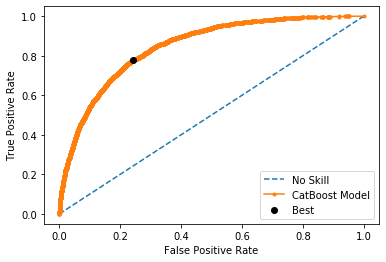

In [269]:
# Plot the ROC curve with the best sensitivity/specificity pair marked
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill', zorder=1)
pyplot.plot(fpr, tpr, marker='.', label='CatBoost Model', zorder=2)
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best', zorder=3)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [270]:
# Calculate Youden's J statistic for all thresholds
J = tpr-fpr
# Locate the index of the largest J to find the best threshold
ix = argmax(J)
print('Best Threshold=%f, J-Stat=%.3f' % (thresholds[ix], J[ix]))

Best Threshold=0.385139, J-Stat=0.537


In [271]:
# Calculate PR curve
precision, recall, thresholds = precision_recall_curve(y_val, cb_val_prob1)

In [272]:
# Calculate F-score
fscore = (2*precision*recall)/(precision+recall)
# Locate the index of the largest F to find the best threshold
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.466875, F-Score=0.596


In [273]:
# Get rid of the NaN in the fscore array (when precision and recall are both 0)
fscore = np.nan_to_num(fscore, nan=-9999)

In [274]:
# Locate the index of the largest F to find the best threshold
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.466875, F-Score=0.596


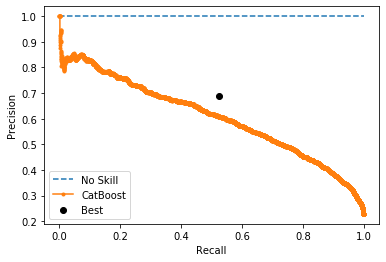

In [275]:
# Plot the PR ROC curve for the model with best precision/recall pair
no_skill = len(y_val[y_val==1]) / len(y_val)
pyplot.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill', zorder=1)
pyplot.plot(recall, precision, marker='.', label='CatBoost', zorder=2)
pyplot.scatter(precision[ix], recall[ix], marker='o', color='black', label='Best', zorder=3)
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()

In [282]:
cb_preds_train['Predicted Class'] = cb_preds_train['Prob1'].apply(lambda x: 1 if x >= 0.47 else 0)
cb_preds_train.head()

,Prob0,Prob1,Predicted Class
0,0.890215,0.109785,0
1,0.956238,0.043762,0
2,0.303425,0.696575,1
3,0.394792,0.605208,1
4,0.898126,0.101874,0


In [283]:
# Confusion matrix with 0.47 as threshold
con_matx = pd.crosstab(y_train['abnormLOS'], cb_preds_train['Predicted Class'],
            rownames=['True'], colnames=['Predicted'], margins=True)
con_matx

Predicted,0,1,All
True,,,
0,43642,6587,50229
1,5263,32408,37671
All,48905,38995,87900


In [285]:
# Accuracy at threshold 0.47 is 
accuracy = (con_matx[0][0]+con_matx[1][1])/len(y_train)
accuracy

0.8651877133105802

In [286]:
cb_preds_val['Predicted Class'] = cb_preds_val['Prob1'].apply(lambda x: 1 if x >= 0.47 else 0)
cb_preds_val.head()

,Prob0,Prob1,Predicted Class
0,0.911464,0.088536,0
1,0.943179,0.056821,0
2,0.607452,0.392548,0
3,0.591980,0.408020,0
4,0.703660,0.296340,0


In [288]:
# Confusion matrix with 0.47 as threshold
con_matx = pd.crosstab(y_val['abnormLOS'], cb_preds_val['Predicted Class'],
            rownames=['True'], colnames=['Predicted'], margins=True)
con_matx

Predicted,0,1,All
True,,,
0,10312,2167,12479
1,1114,2407,3521
All,11426,4574,16000


In [290]:
# Accuracy at threshold 0.47 is 
accuracy = (con_matx[0][0]+con_matx[1][1])/len(y_val)
accuracy

0.7949375

### Predict probabilities of test set

https://www.kaggle.com/manrunning/catboost-for-titanic-top-7

In [291]:
x_test_cat = x_test.drop(['ID_tmp'], axis=1)

In [292]:
test_pool = Pool(data=x_test_cat, cat_features=cat_features_index)

In [293]:
x_test_cat.shape

(11202, 291)

In [294]:
cb_test_probs = model.predict_proba(test_pool)
cb_test_probs

array([[0.58199529, 0.41800471],
       [0.81318161, 0.18681839],
       [0.5016543 , 0.4983457 ],
       ...,
       [0.6466216 , 0.3533784 ],
       [0.34173932, 0.65826068],
       [0.82120996, 0.17879004]])

In [295]:
cb_preds_test = pd.DataFrame(cb_test_probs, columns = cb_prob_cols)
cb_preds_test.head()

,Prob0,Prob1
0,0.581995,0.418005
1,0.813182,0.186818
2,0.501654,0.498346
3,0.697293,0.302707
4,0.986006,0.013994


In [296]:
cb_preds_test['ID1'] = x_test['ID_tmp']

In [297]:
cb_preds_test

,Prob0,Prob1,ID1
0,0.581995,0.418005,1
1,0.813182,0.186818,2
2,0.501654,0.498346,3
3,0.697293,0.302707,4
4,0.986006,0.013994,5
...,...,...,...
11197,0.422340,0.577660,11198
11198,0.830764,0.169236,11199
11199,0.646622,0.353378,11200
11200,0.341739,0.658261,11201
